In [187]:
# Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.io as pio
import random
import joblib

import scipy.stats as stats
from scipy.stats import chi2_contingency

from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import SMOTE

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import auc, roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, fbeta_score, confusion_matrix, classification_report

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score, KFold
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

from collections import Counter
from sklearn.ensemble import VotingClassifier
from sklearn import model_selection



In [188]:
# Load dataset
df1 = pd.read_csv('RSU50-20249401-DataSet.csv')

# Display the first few rows of the dataset
df1.head()

,POLICYNO,PRODUCT_TYPE,POLICYTERM_YEARS,COMMENCEDATE,COMMENCED_YEAR,PAYMENT_FREQUENCY,ANNUAL_PREMIUM,PAYMENT_METHOD,LASTPAYMENTDATE,NEXTPAYMENTDATE,...,BASIC_SUMINSURED,ACCIDENT_SUMINSURED,HOSPITALIZATION_SUMINSURED,OTHER COVERS_SUMINSURED,AGE,GENDER,MARITAL_STATUS,PROVINCECODE,TOTAL_PAYMENT,POLICY_STATUS
0,NJEV2018-453,ENDOW,49,2/25/2018,2018,M,24732,CASH,4/25/2018,5/25/2018 0:00,...,500000,0,0,0,32,M,M,NRWTN,6183,LAPSE
1,NJEV2018-2541,ENDOW,49,10/19/2018,2018,M,24732,CASH,10/19/2018,11/19/2018 0:00,...,500000,0,0,0,32,M,M,NRCTL,2061,LAPSE
2,NJEV2018-1209,ENDOW,49,5/25/2018,2018,M,24732,CASH,5/25/2018,6/25/2018 0:00,...,500000,0,0,0,32,M,M,UVA,2061,LAPSE
3,NJEV2018-1378,ENDOW,49,6/11/2018,2018,M,24732,CASH,2/11/2020,3/11/2020 0:00,...,500000,0,0,0,32,F,M,NRWTN,43281,LAPSE
4,NJEV2018-1853,ENDOW,49,8/8/2018,2018,M,24732,CASH,8/8/2018,9/8/2018 0:00,...,500000,0,0,0,32,M,M,NRWTN,2061,LAPSE


In [189]:
#Shape of the dataframe

print("The shape of the dataframe is: {}".format(df1.shape))

The shape of the dataframe is: (61053, 24)


In [190]:
#Columns of the dataframe

df1.columns

Index(['POLICYNO', 'PRODUCT_TYPE', 'POLICYTERM_YEARS', 'COMMENCEDATE',
       'COMMENCED_YEAR', 'PAYMENT_FREQUENCY', 'ANNUAL_PREMIUM',
       'PAYMENT_METHOD', 'LASTPAYMENTDATE', 'NEXTPAYMENTDATE',
       'NEXTPAYMENT_YEAR', 'TENURE_MONTHS', 'NO_OF_COVERS', 'TOTAL_SUMINSURED',
       'BASIC_SUMINSURED', 'ACCIDENT_SUMINSURED', 'HOSPITALIZATION_SUMINSURED',
       'OTHER COVERS_SUMINSURED', 'AGE', 'GENDER', 'MARITAL_STATUS',
       'PROVINCECODE', 'TOTAL_PAYMENT', 'POLICY_STATUS'],
      dtype='object')

In [191]:
# Basic dataset information

print(df1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61053 entries, 0 to 61052
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   POLICYNO                    61053 non-null  object
 1   PRODUCT_TYPE                61053 non-null  object
 2   POLICYTERM_YEARS            61053 non-null  int64 
 3   COMMENCEDATE                61053 non-null  object
 4   COMMENCED_YEAR              61053 non-null  int64 
 5   PAYMENT_FREQUENCY           61053 non-null  object
 6   ANNUAL_PREMIUM              61053 non-null  int64 
 7   PAYMENT_METHOD              61053 non-null  object
 8   LASTPAYMENTDATE             61053 non-null  object
 9   NEXTPAYMENTDATE             61053 non-null  object
 10  NEXTPAYMENT_YEAR            61053 non-null  int64 
 11  TENURE_MONTHS               61053 non-null  int64 
 12  NO_OF_COVERS                61053 non-null  int64 
 13  TOTAL_SUMINSURED            61053 non-null  in

<Axes: >

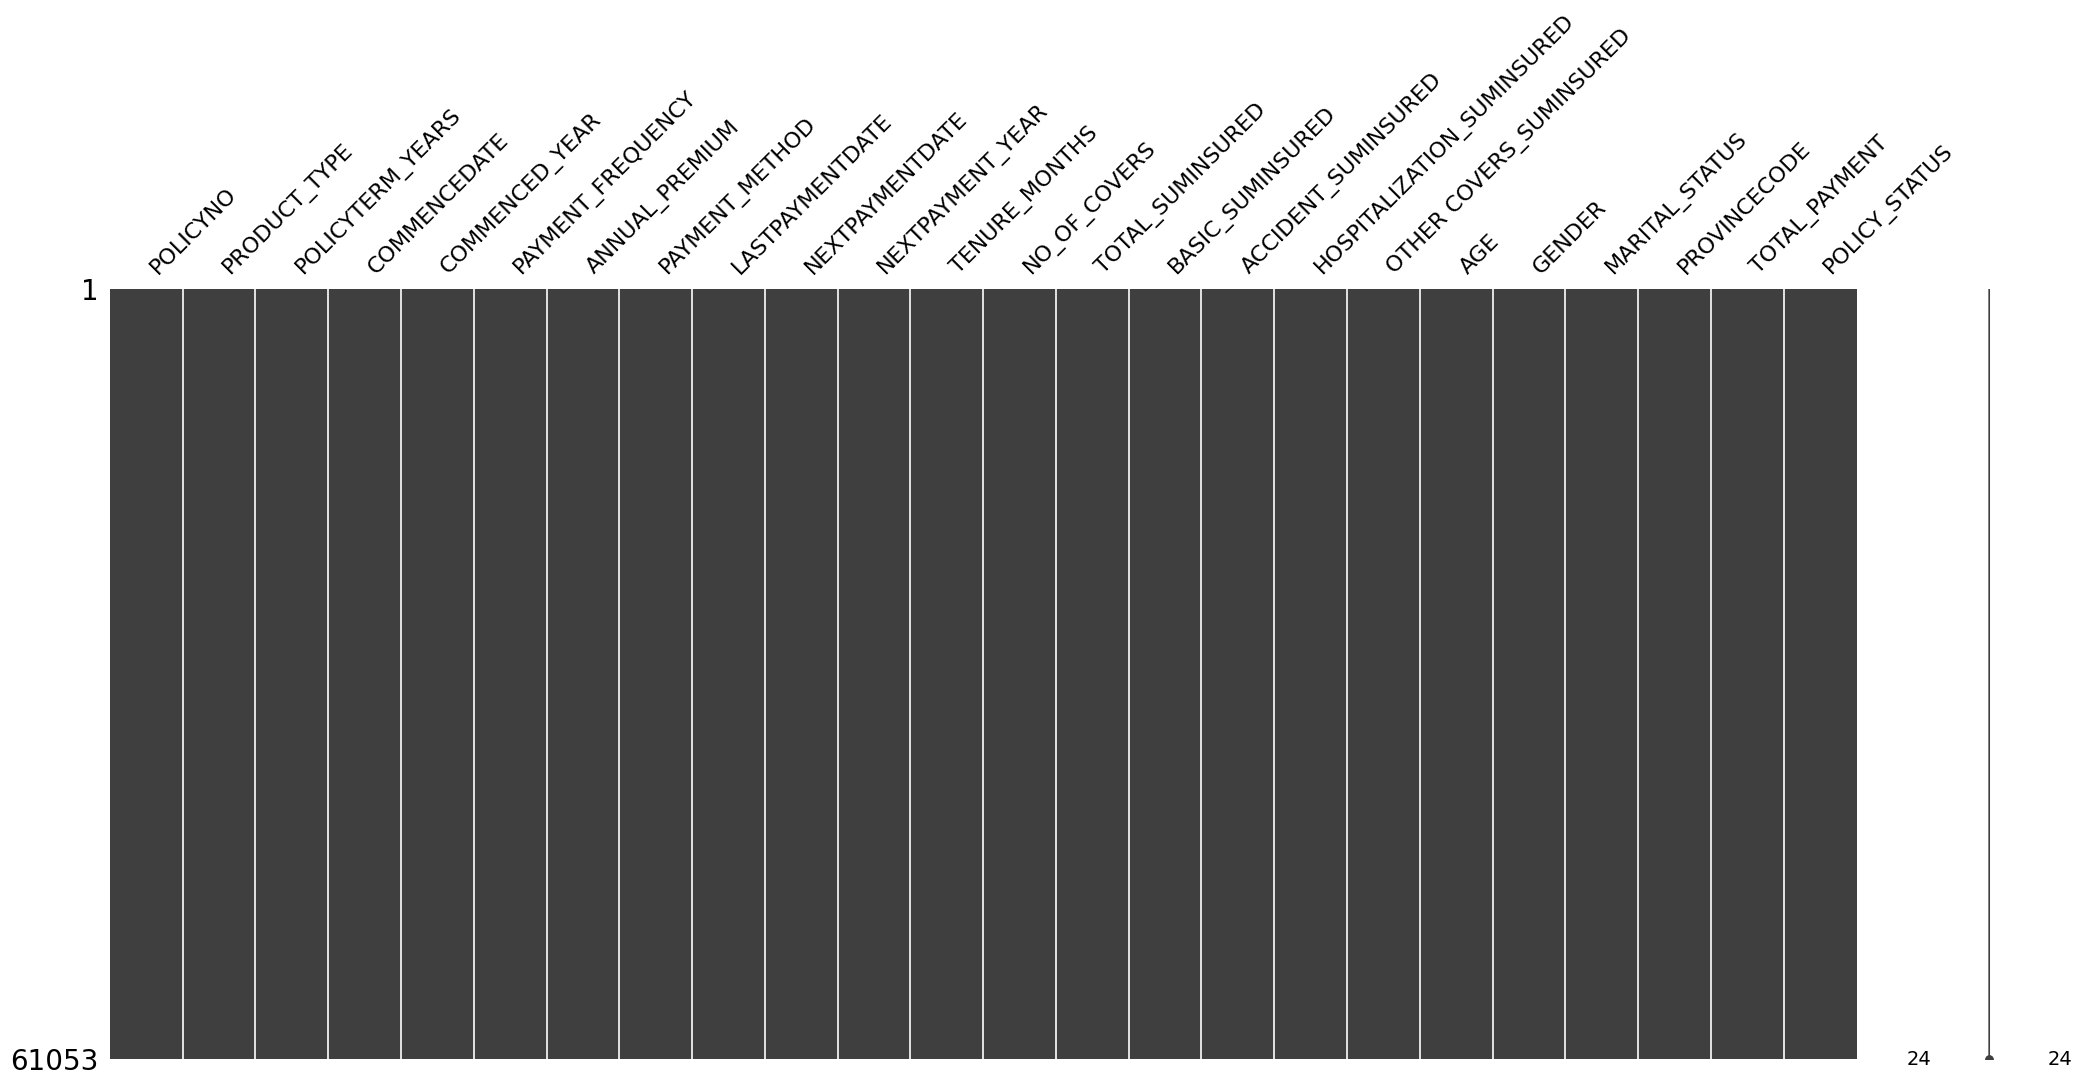

In [192]:
#Visualize Missing Values

msno.matrix(df1)


In [193]:
#Check whether there's any null values

df1.isnull().any().any()

False

In [194]:
#No of missing values in each column

df1.isnull().sum()

POLICYNO                      0
PRODUCT_TYPE                  0
POLICYTERM_YEARS              0
COMMENCEDATE                  0
COMMENCED_YEAR                0
PAYMENT_FREQUENCY             0
ANNUAL_PREMIUM                0
PAYMENT_METHOD                0
LASTPAYMENTDATE               0
NEXTPAYMENTDATE               0
NEXTPAYMENT_YEAR              0
TENURE_MONTHS                 0
NO_OF_COVERS                  0
TOTAL_SUMINSURED              0
BASIC_SUMINSURED              0
ACCIDENT_SUMINSURED           0
HOSPITALIZATION_SUMINSURED    0
OTHER COVERS_SUMINSURED       0
AGE                           0
GENDER                        0
MARITAL_STATUS                0
PROVINCECODE                  0
TOTAL_PAYMENT                 0
POLICY_STATUS                 0
dtype: int64

In [195]:
#Checking Duplicates

print('Known observations: {}\nUnique observations: {}'.format(len(df1.index),len(df1.drop_duplicates().index)))

print("**No duplicates Found!**")

Known observations: 61053
Unique observations: 61053
**No duplicates Found!**


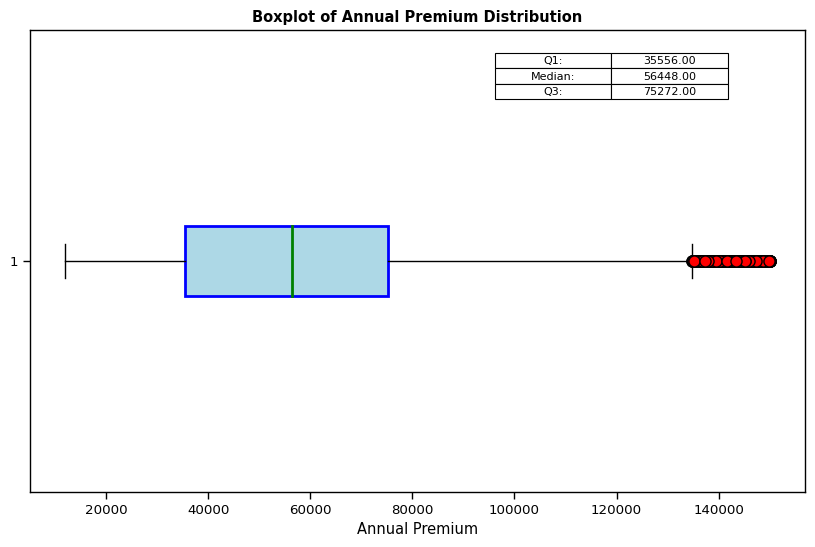

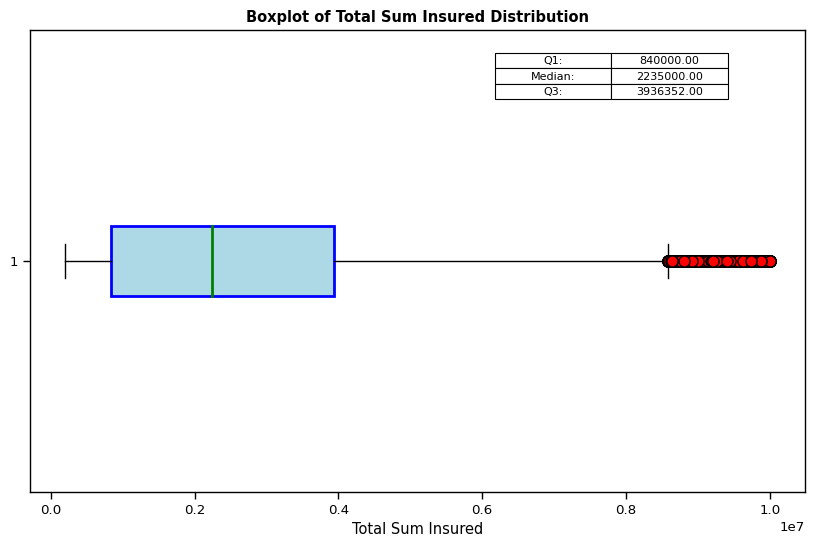

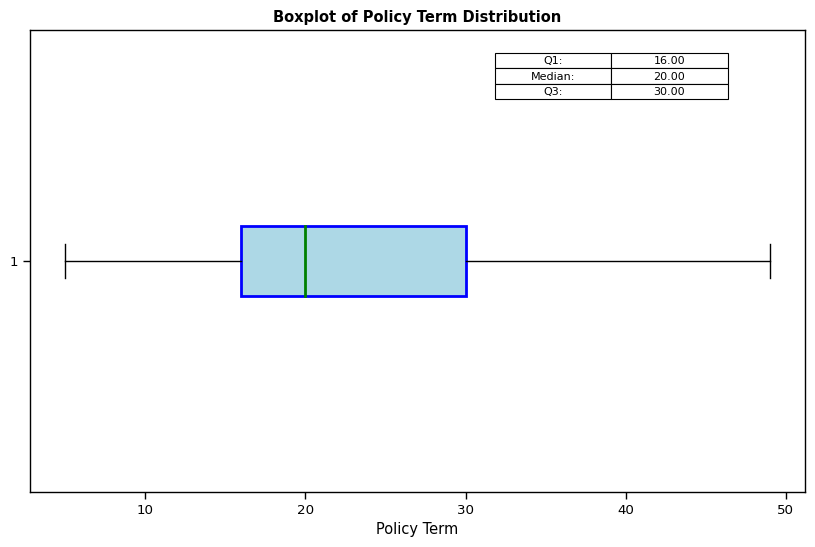

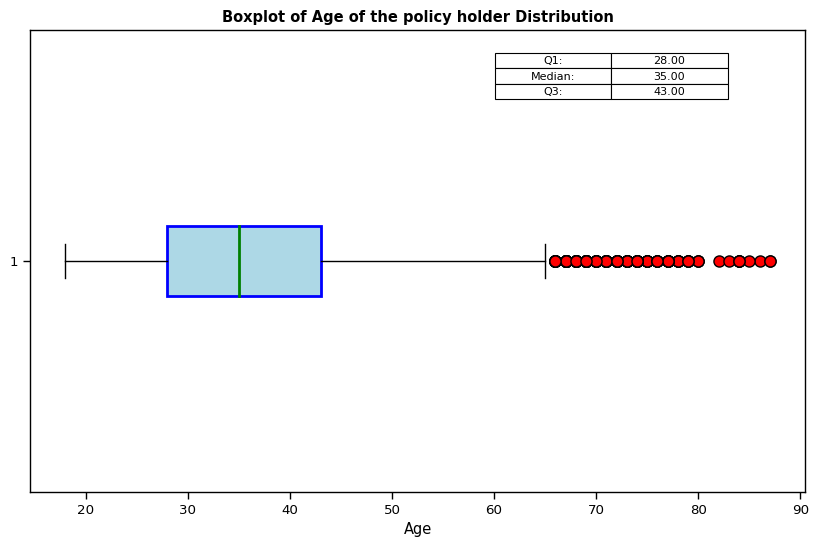

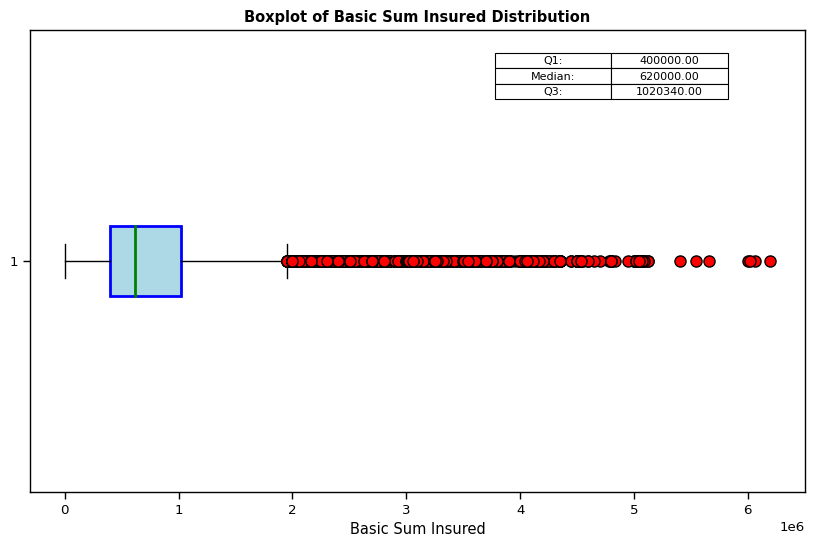

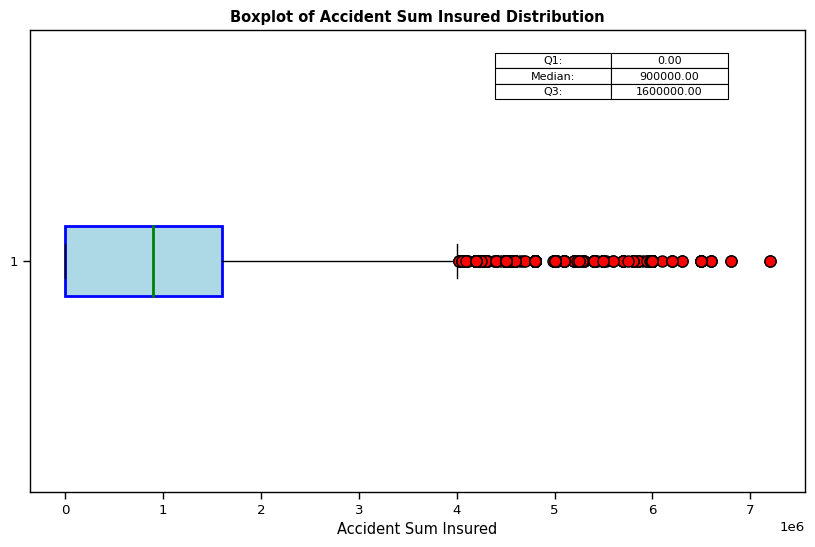

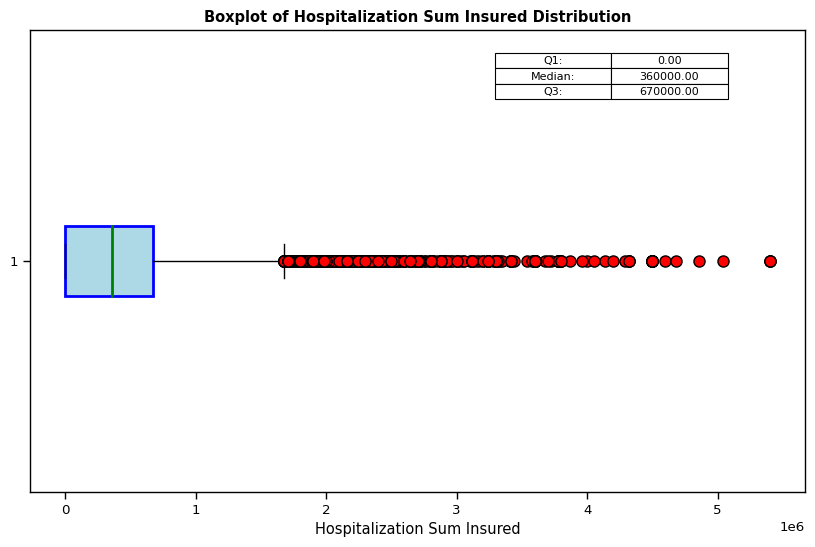

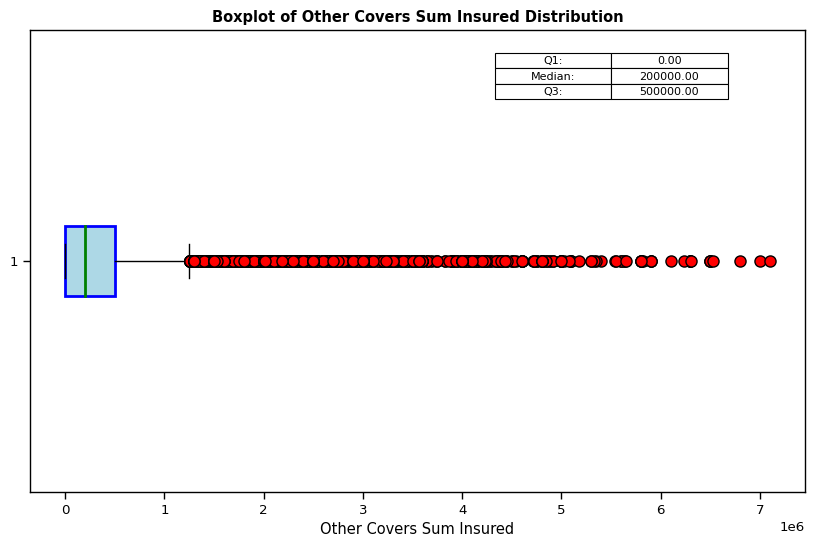

In [196]:
# Box Plots to check the distribution of data

def create_custom_boxplot(data, title, x_label):
    # Set custom styles for boxplot elements
    boxprops = dict(linestyle='-', linewidth=2, color='blue', facecolor='lightblue')  # Light blue fill color
    flierprops = dict(marker='o', markerfacecolor='red', markersize=8, linestyle='none')
    medianprops = dict(linestyle='-', linewidth=2, color='green')

    # Create the boxplot
    fig, ax = plt.subplots(figsize=(10, 6))
    boxplot = ax.boxplot(data, vert=False, patch_artist=True, showfliers=True,
                         boxprops=boxprops, flierprops=flierprops, medianprops=medianprops)

    # Add title and axis labels
    ax.set_title(title, fontweight='bold')
    ax.set_xlabel(x_label)

    # Calculate quartile values
    quartiles = np.percentile(data, [25, 50, 75])
    q1, median, q3 = quartiles[0], quartiles[1], quartiles[2]

    # Create a table to display quartile values
    table_data = [['Q1:', f'{q1:.2f}'],
                  ['Median:', f'{median:.2f}'],
                  ['Q3:', f'{q3:.2f}']]

    # Adjust the bbox parameter to move the table to the top right corner
    table = ax.table(cellText=table_data, colWidths=[0.6, 0.6], cellLoc='center', loc='upper right', bbox=[0.6, 0.85, 0.3, 0.1])
    table.auto_set_font_size(False)
    table.set_fontsize(8)

    plt.show()

create_custom_boxplot(df1['ANNUAL_PREMIUM'], 'Boxplot of Annual Premium Distribution', 'Annual Premium')
create_custom_boxplot(df1['TOTAL_SUMINSURED'], 'Boxplot of Total Sum Insured Distribution', 'Total Sum Insured')
create_custom_boxplot(df1['POLICYTERM_YEARS'], 'Boxplot of Policy Term Distribution', 'Policy Term')
create_custom_boxplot(df1['AGE'], 'Boxplot of Age of the policy holder Distribution', 'Age')
create_custom_boxplot(df1['BASIC_SUMINSURED'], 'Boxplot of Basic Sum Insured Distribution', 'Basic Sum Insured')
create_custom_boxplot(df1['ACCIDENT_SUMINSURED'], 'Boxplot of Accident Sum Insured Distribution', 'Accident Sum Insured')
create_custom_boxplot(df1['HOSPITALIZATION_SUMINSURED'], 'Boxplot of Hospitalization Sum Insured Distribution', 'Hospitalization Sum Insured')
create_custom_boxplot(df1['OTHER COVERS_SUMINSURED'], 'Boxplot of Other Covers Sum Insured Distribution', 'Other Covers Sum Insured')

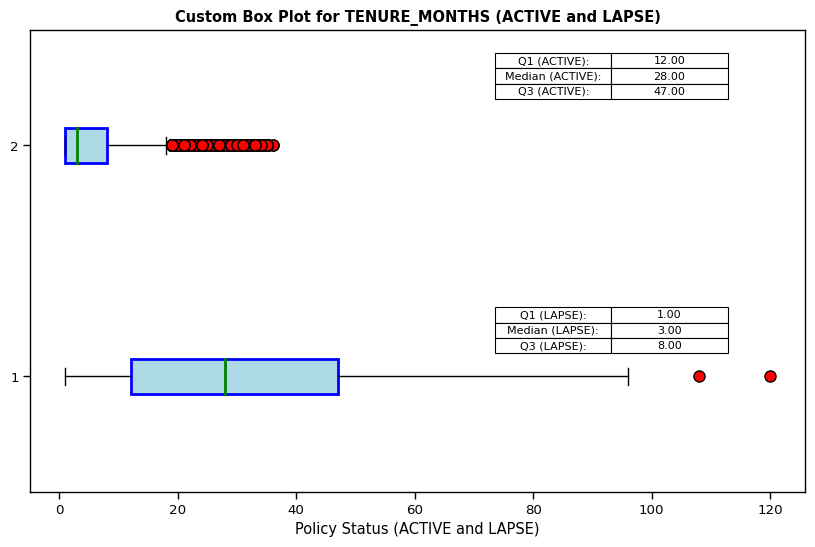

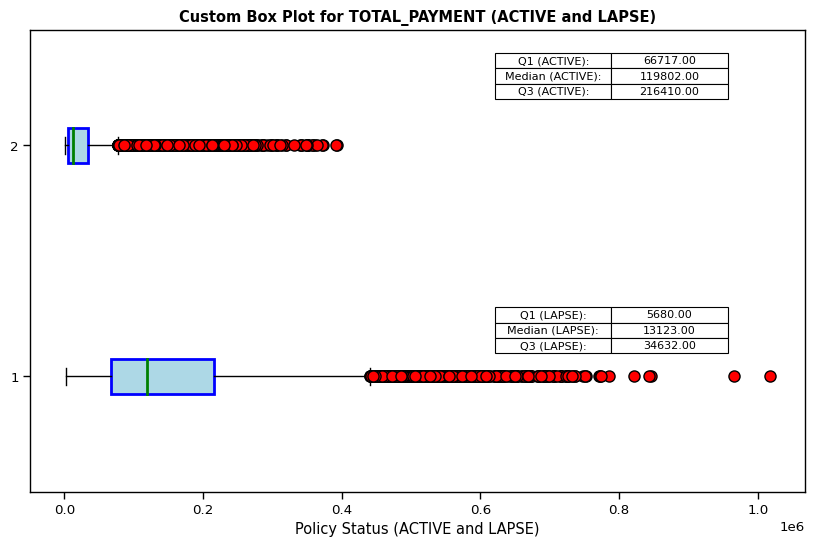

In [197]:
# Policy Status wise distribution of policies for TENURE_MONTHS, TOTAL_PAYMENT, NO_OF_SETTLED_CLAIMS, PAIDCLAIM_AMOUNT, LAST_CLAIM_PROCESSTIME_DAYS

active_data = df1[df1['POLICY_STATUS'] == 'ACTIVE']
lapse_data = df1[df1['POLICY_STATUS'] == 'LAPSE']

# Create a function to create custom box plots
def create_custom_boxplots(data1, data2, title, x_label):
    # Set custom styles for boxplot elements
    boxprops = dict(linestyle='-', linewidth=2, color='blue', facecolor='lightblue')  # Light blue fill color
    flierprops = dict(marker='o', markerfacecolor='red', markersize=8, linestyle='none')
    medianprops = dict(linestyle='-', linewidth=2, color='green')

    # Create the boxplot
    fig, ax = plt.subplots(figsize=(10, 6))
    positions = [1, 2]  # Define positions for the two boxplots
    boxplot1 = ax.boxplot([data1], positions=[positions[0]], vert=False, patch_artist=True, showfliers=True,
                         boxprops=boxprops, flierprops=flierprops, medianprops=medianprops)
    
    boxplot2 = ax.boxplot([data2], positions=[positions[1]], vert=False, patch_artist=True, showfliers=True,
                         boxprops=boxprops, flierprops=flierprops, medianprops=medianprops)

    # Add title and axis labels
    ax.set_title(title, fontweight='bold')
    ax.set_xlabel(x_label)

    # Calculate quartile values for data1
    quartiles1 = np.percentile(data1, [25, 50, 75])
    q1_1, median_1, q3_1 = quartiles1[0], quartiles1[1], quartiles1[2]

    # Calculate quartile values for data2
    quartiles2 = np.percentile(data2, [25, 50, 75])
    q1_2, median_2, q3_2 = quartiles2[0], quartiles2[1], quartiles2[2]

    # Create tables to display quartile values for data1
    table_data1 = [
        [f'Q1 (ACTIVE):', f'{q1_1:.2f}'],
        [f'Median (ACTIVE):', f'{median_1:.2f}'],
        [f'Q3 (ACTIVE):', f'{q3_1:.2f}'],
    ]

    # Create tables to display quartile values for data2
    table_data2 = [
        [f'Q1 (LAPSE):', f'{q1_2:.2f}'],
        [f'Median (LAPSE):', f'{median_2:.2f}'],
        [f'Q3 (LAPSE):', f'{q3_2:.2f}'],
    ]

    # Adjust the bbox parameter to move the tables to separate positions
    table1 = ax.table(cellText=table_data1, colWidths=[0.6, 0.6], cellLoc='center', loc='upper right', bbox=[0.6, 0.85, 0.3, 0.1])
    table1.auto_set_font_size(False)
    table1.set_fontsize(8)

    table2 = ax.table(cellText=table_data2, colWidths=[0.6, 0.6], cellLoc='center', loc='lower right', bbox=[0.6, 0.3, 0.3, 0.1])
    table2.auto_set_font_size(False)
    table2.set_fontsize(8)

    plt.show()



# Call the function to create the box plots
create_custom_boxplots(active_data['TENURE_MONTHS'], lapse_data['TENURE_MONTHS'], "Custom Box Plot for TENURE_MONTHS (ACTIVE and LAPSE)", "Policy Status (ACTIVE and LAPSE)")
create_custom_boxplots(active_data['TOTAL_PAYMENT'], lapse_data['TOTAL_PAYMENT'], "Custom Box Plot for TOTAL_PAYMENT (ACTIVE and LAPSE)", "Policy Status (ACTIVE and LAPSE)")


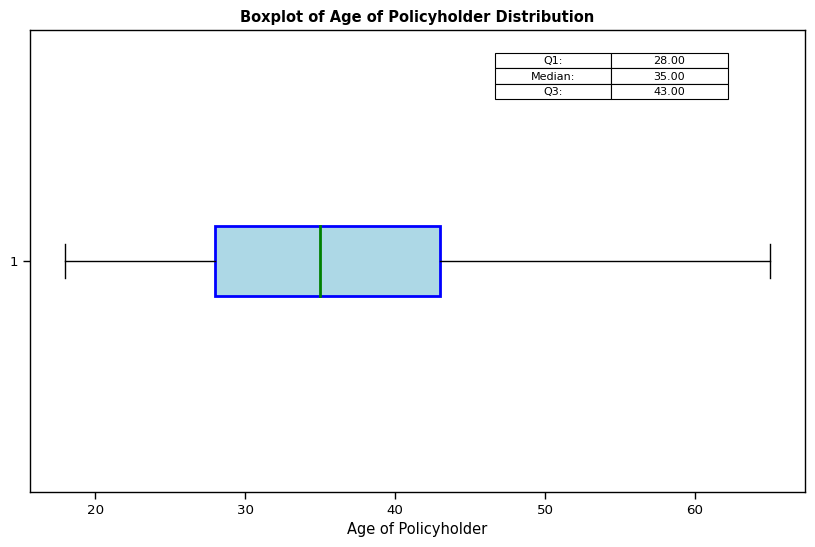

In [198]:
# Remove Outliers from Age of the Policy Holder

column_name = 'AGE'
z_scores = stats.zscore(df1[column_name])  # Calculate the z-scores for the column
threshold = 2.8 # Define a threshold for identifying outliers
outlier_mask = (abs(z_scores) < threshold)
df1 = df1[outlier_mask]

create_custom_boxplot(df1['AGE'], 'Boxplot of Age of Policyholder Distribution', 'Age of Policyholder')

In [199]:
# Drop the columns

df1 = df1.drop(["COMMENCEDATE","LASTPAYMENTDATE","NEXTPAYMENTDATE","PROVINCECODE"], axis = 1)
df1.head()

,POLICYNO,PRODUCT_TYPE,POLICYTERM_YEARS,COMMENCED_YEAR,PAYMENT_FREQUENCY,ANNUAL_PREMIUM,PAYMENT_METHOD,NEXTPAYMENT_YEAR,TENURE_MONTHS,NO_OF_COVERS,TOTAL_SUMINSURED,BASIC_SUMINSURED,ACCIDENT_SUMINSURED,HOSPITALIZATION_SUMINSURED,OTHER COVERS_SUMINSURED,AGE,GENDER,MARITAL_STATUS,TOTAL_PAYMENT,POLICY_STATUS
0,NJEV2018-453,ENDOW,49,2018,M,24732,CASH,2018,3,1,500000,500000,0,0,0,32,M,M,6183,LAPSE
1,NJEV2018-2541,ENDOW,49,2018,M,24732,CASH,2018,1,1,500000,500000,0,0,0,32,M,M,2061,LAPSE
2,NJEV2018-1209,ENDOW,49,2018,M,24732,CASH,2018,1,1,500000,500000,0,0,0,32,M,M,2061,LAPSE
3,NJEV2018-1378,ENDOW,49,2018,M,24732,CASH,2020,21,1,500000,500000,0,0,0,32,F,M,43281,LAPSE
4,NJEV2018-1853,ENDOW,49,2018,M,24732,CASH,2018,1,1,500000,500000,0,0,0,32,M,M,2061,LAPSE


In [200]:
#Shape of the dataframe after removing outliers

print("The shape of the dataframe after removing outliers is: {}".format(df1.shape))

The shape of the dataframe after removing outliers is: (60771, 20)


In [201]:

# Group the data by POLICY_STATUS and count occurrences

policy_status_counts = df1['POLICY_STATUS'].value_counts()
percentage = (policy_status_counts / policy_status_counts.sum()) * 100
policy_status_summary = pd.DataFrame({'Count': policy_status_counts, 'Percentage': percentage})

policy_status_summary.rename(columns={'index': 'POLICY_STATUS'}, inplace=True)
policy_status_summary.sort_values(by='Count', ascending=True, inplace=True)

print(policy_status_summary)


               Count  Percentage
POLICY_STATUS                   
ACTIVE         12397   20.399533
LAPSE          48374   79.600467


In [202]:
#Find unique values in categorical variables

catagorical = [i for i in df1.columns if df1[i].dtypes == 'object']

for i in catagorical:   
    print(i, ':', df1[i].unique())

POLICYNO : ['NJEV2018-453' 'NJEV2018-2541' 'NJEV2018-1209' ... 'NGT022018-97'
 'JCA012018-552' 'JCA012018-25']
PRODUCT_TYPE : ['ENDOW' 'UL']
PAYMENT_FREQUENCY : ['M' 'A' 'Q' 'H']
PAYMENT_METHOD : ['CASH' 'STANDING ORDER' 'DIGITAL PAYMENT']
GENDER : ['M' 'F']
MARITAL_STATUS : ['M' 'S']
POLICY_STATUS : ['LAPSE' 'ACTIVE']


In [203]:
#Count unique values in categorical variables

df1.describe(include=['object']).T

,count,unique,top,freq
POLICYNO,60771,60771,NJEV2018-453,1
PRODUCT_TYPE,60771,2,ENDOW,40066
PAYMENT_FREQUENCY,60771,4,M,47521
PAYMENT_METHOD,60771,3,CASH,50545
GENDER,60771,2,M,35515
MARITAL_STATUS,60771,2,M,44633
POLICY_STATUS,60771,2,LAPSE,48374


In [204]:
# Shows statistical summaries for all numeric columns

df1.describe()

,POLICYTERM_YEARS,COMMENCED_YEAR,ANNUAL_PREMIUM,NEXTPAYMENT_YEAR,TENURE_MONTHS,NO_OF_COVERS,TOTAL_SUMINSURED,BASIC_SUMINSURED,ACCIDENT_SUMINSURED,HOSPITALIZATION_SUMINSURED,OTHER COVERS_SUMINSURED,AGE,TOTAL_PAYMENT
count,60771.000000,60771.000000,60771.000000,60771.000000,60771.000000,60771.000000,6.077100e+04,6.077100e+04,6.077100e+04,6.077100e+04,6.077100e+04,60771.000000,6.077100e+04
mean,24.211170,2020.252884,60244.693341,2021.084366,10.609847,3.032795,2.698820e+06,8.286226e+05,1.068602e+06,4.447774e+05,3.568185e+05,35.841750,5.445072e+04
std,12.025794,1.425500,29855.475211,1.633936,14.201579,1.305421,2.114820e+06,6.158596e+05,1.164222e+06,4.708252e+05,5.054449e+05,10.260209,8.531643e+04
min,5.000000,2018.000000,12024.000000,2018.000000,1.000000,1.000000,2.000000e+05,4.068000e+03,0.000000e+00,0.000000e+00,0.000000e+00,18.000000,1.504000e+03
25%,16.000000,2019.000000,35568.000000,2020.000000,1.000000,2.000000,8.510000e+05,4.006000e+05,0.000000e+00,0.000000e+00,0.000000e+00,28.000000,6.396000e+03
50%,20.000000,2021.000000,56868.000000,2021.000000,4.000000,4.000000,2.250000e+06,6.212000e+05,9.000000e+05,3.600000e+05,2.000000e+05,35.000000,2.088800e+04
75%,30.000000,2021.000000,75324.000000,2022.000000,12.000000,4.000000,3.945210e+06,1.020440e+06,1.600000e+06,6.840000e+05,5.000000e+05,43.000000,6.383650e+04
max,49.000000,2022.000000,150000.000000,2029.000000,120.000000,6.000000,1.000000e+07,6.192784e+06,7.200000e+06,5.400000e+06,7.100000e+06,65.000000,1.017500e+06


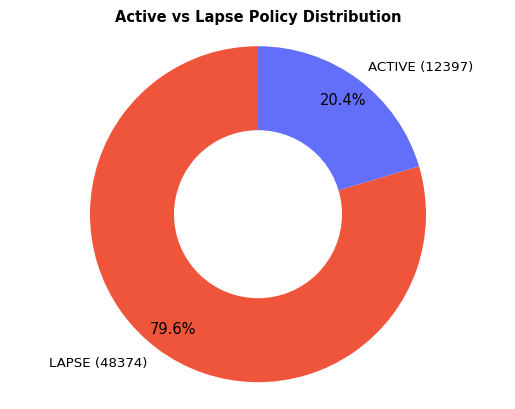

In [205]:
# Active and Lapse Policy Distribution

policy_status_counts = df1['POLICY_STATUS'].value_counts()
type_ = policy_status_counts.index
values = policy_status_counts.values
custom_colors = ['#EF553B', '#636EFA']

# Create labels with counts
labels = [f"{t} ({v})" for t, v in zip(type_, values)]

# Create a donut chart
fig, ax = plt.subplots()
ax.pie(values, labels=labels, autopct='%1.1f%%', colors=custom_colors, startangle=90, pctdistance=0.85)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Draw a white circle at the center to make it a donut chart
center_circle = plt.Circle((0, 0), 0.50, fc='white')
fig.gca().add_artist(center_circle)

# Add a title
plt.title(f"Active vs Lapse Policy Distribution", fontweight='bold')

# Show the chart
plt.show()

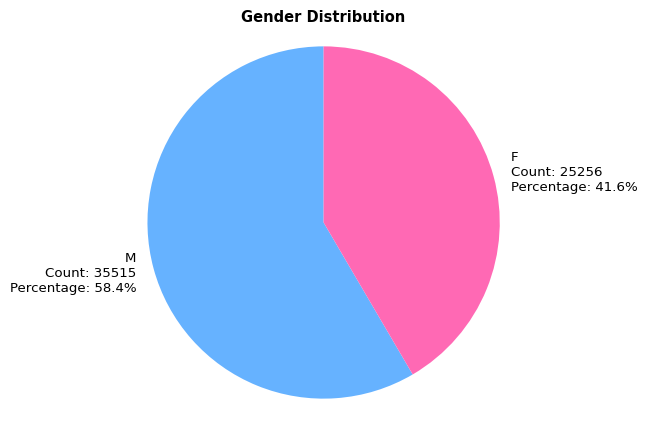

In [206]:
#Pie chart which represents Gender distribution of policy holders

# Calculate gender counts
gender_counts = df1['GENDER'].value_counts()

# Calculate percentages
total_count = len(df1)
gender_percentages = (gender_counts / total_count) * 100

# Define custom colors
custom_colors = ['#66B2FF', 'hotpink']  # Custom colors for Male and Female

# Create pie chart labels with gender, count, and percentage
labels = gender_counts.index
labels_with_info = [f"{gender}\nCount: {count}\nPercentage: {percentage:.1f}%" for gender, count, percentage in zip(labels, gender_counts, gender_percentages)]

# Create a pie chart
plt.figure(figsize=(5, 5))
plt.pie(gender_counts, labels=labels_with_info, autopct='', colors=custom_colors, startangle=90)
plt.title("Gender Distribution",fontweight='bold')

# Display the chart
plt.axis('equal')
plt.show()

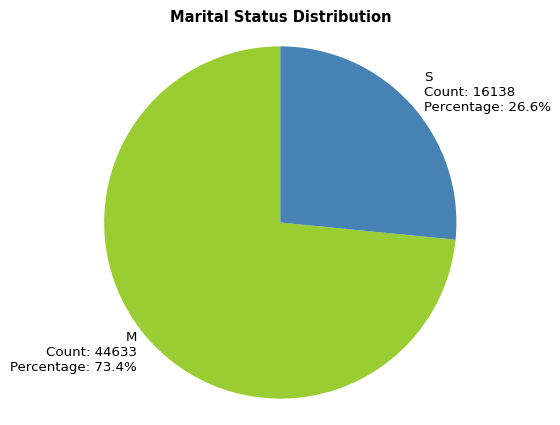

In [207]:
#Pie chart which represents distribution of Marital Status of policy holders

# Calculate marital status counts
marital_status_counts = df1['MARITAL_STATUS'].value_counts()

# Calculate percentages
total_count = len(df1)
marital_status_percentages = (marital_status_counts / total_count) * 100

# Define custom colors
custom_colors = ['yellowgreen', 'steelblue']  # Custom colors for Married and Single

# Create pie chart labels with marital status, count, and percentage
labels = marital_status_counts.index
labels_with_info = [f"{marital_status}\nCount: {count}\nPercentage: {percentage:.1f}%" for marital_status, count, percentage in zip(labels, marital_status_counts, marital_status_percentages)]

# Create a pie chart
plt.figure(figsize=(5, 5))
plt.pie(marital_status_counts, labels=labels_with_info, autopct='', colors=custom_colors, startangle=90)
plt.title("Marital Status Distribution", fontweight='bold')

# Display the chart
plt.axis('equal')
plt.show()

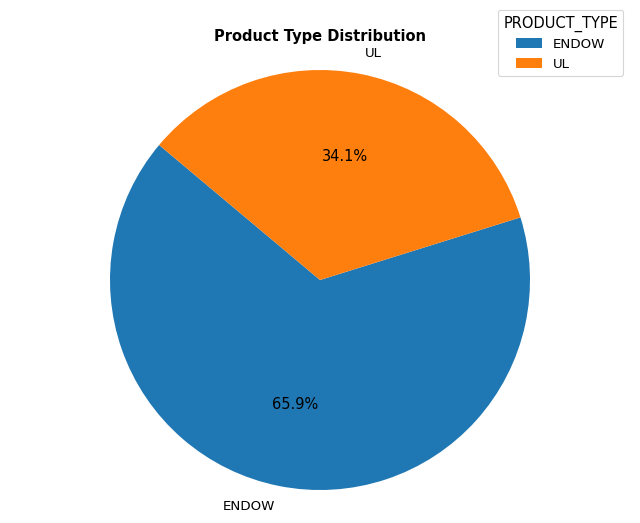

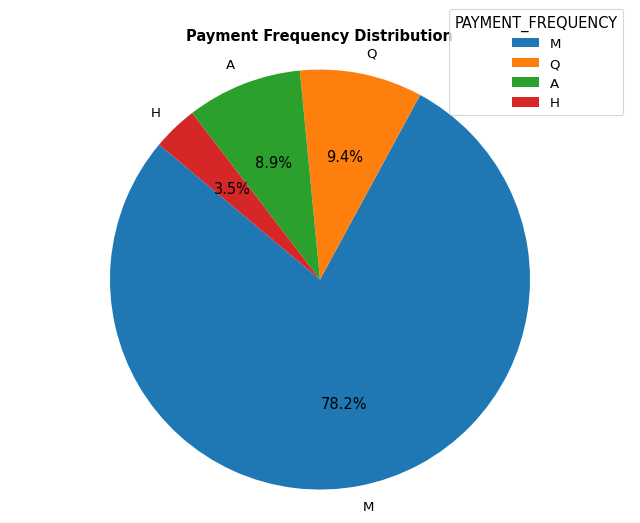

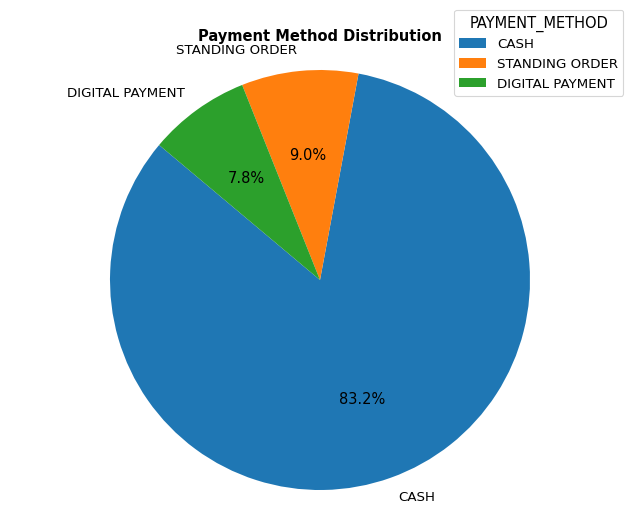

In [208]:
#Pie Charts for Product Type, Payment Frequecy, Payment Method

def create_pie_chart(data, column_name, title):
    # Group the data by the specified column and count the number of occurrences for each category
    column_counts = data[column_name].value_counts()

    # Create a pie chart
    plt.figure(figsize=(8, 6))
    plt.pie(column_counts, labels=column_counts.index, autopct='%1.1f%%', startangle=140)
    plt.title(title, fontweight='bold')
    plt.axis('equal')  # Equal aspect ratio ensures that the pie chart is drawn as a circle.

    # Add a legend
    plt.legend(column_counts.index, title=column_name, loc='upper right', bbox_to_anchor=(1, 1.1))

    plt.show()


create_pie_chart(df1, 'PRODUCT_TYPE', 'Product Type Distribution')
create_pie_chart(df1, 'PAYMENT_FREQUENCY', 'Payment Frequency Distribution')
create_pie_chart(df1, 'PAYMENT_METHOD', 'Payment Method Distribution')


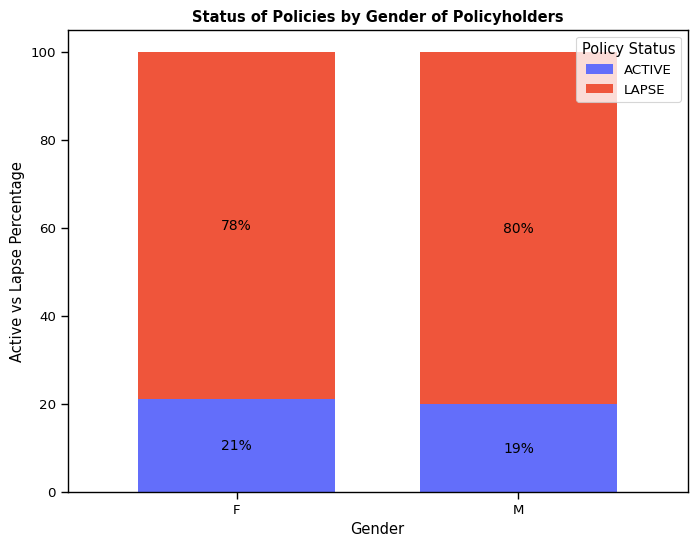

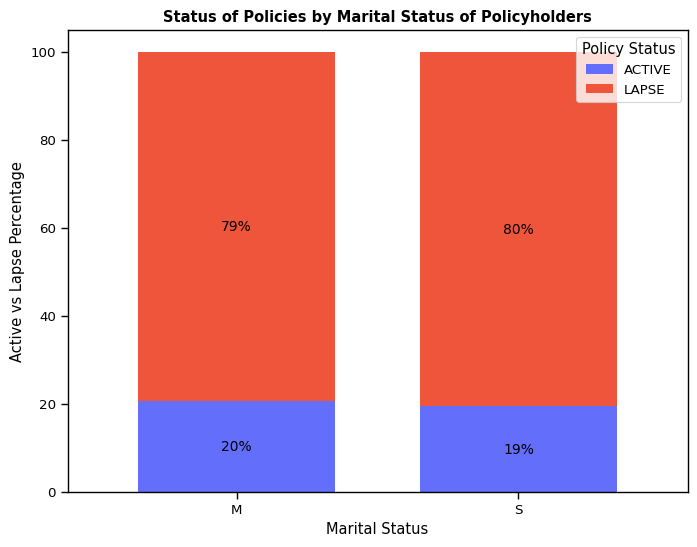

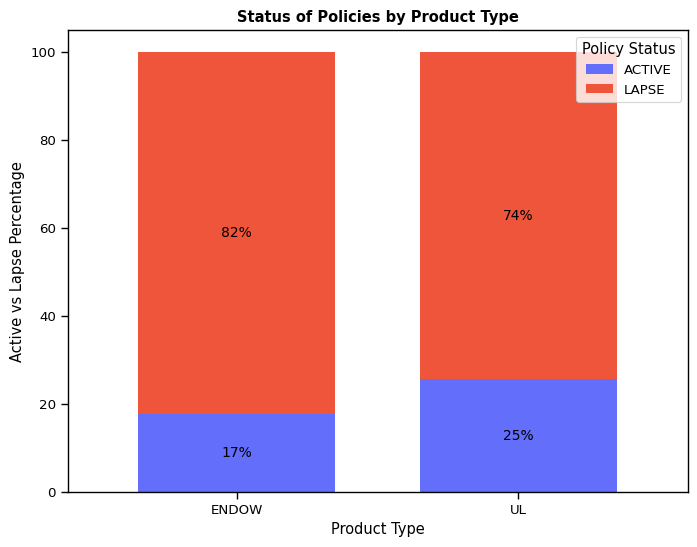

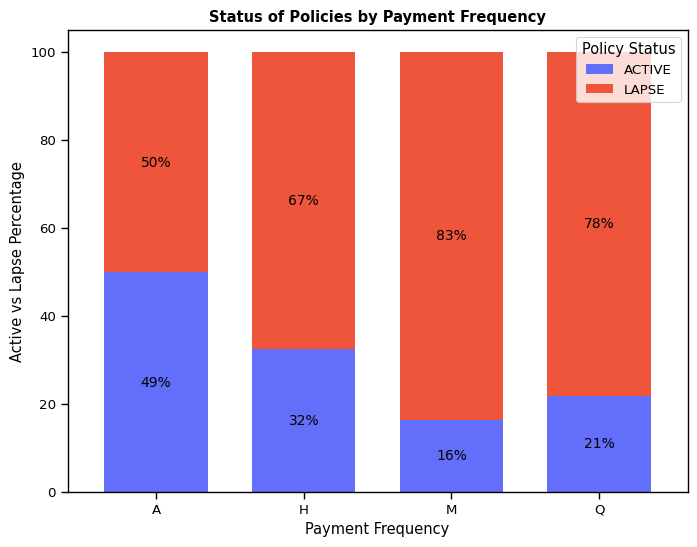

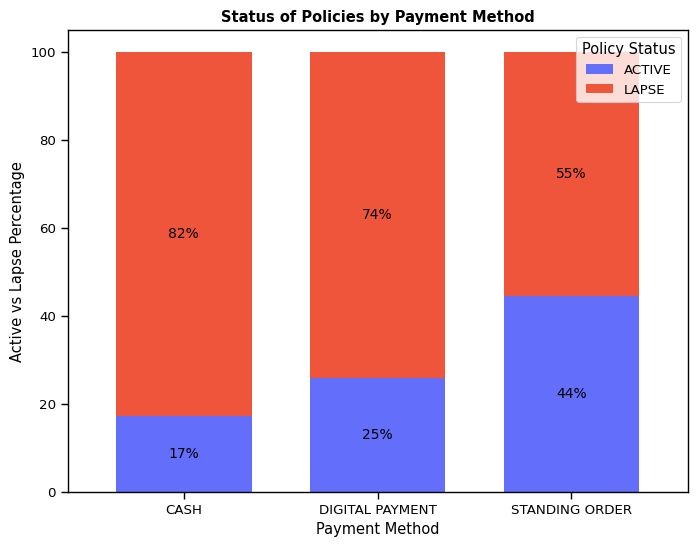

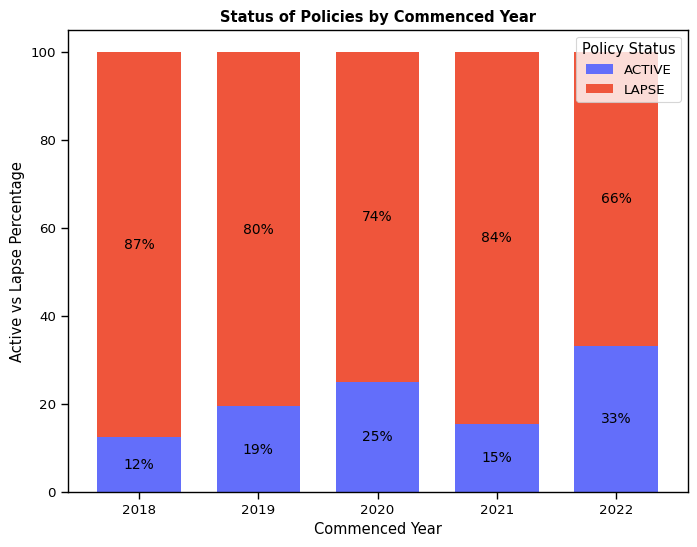

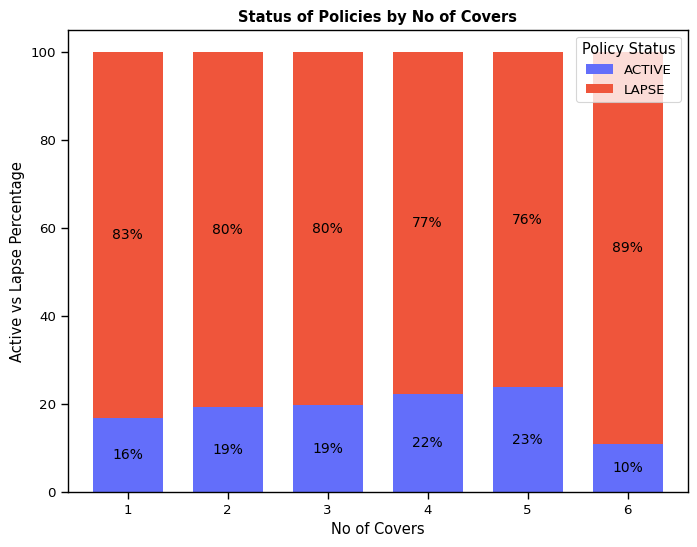

In [209]:
# Stacked bar charts to present the Active vs Lapse policy distribution of different categorical variables

def create_stacked_bar_chart(data, x_column, y_column, title, xlabel, ylabel, legend_title):
    # Group the data by the specified columns and count the number of occurrences in each group
    grouped = data.groupby([x_column, y_column]).size().unstack(fill_value=0)

    # Calculate the total count of items for each group
    total_counts = grouped.sum(axis=1)

    # Calculate the percentages
    percentage_grouped = grouped.div(total_counts, axis=0) * 100

    # Define custom colors for each category within the y_column
    custom_colors = {
        'ACTIVE': '#636EFA',
        'LAPSE': '#EF553B'
    }

    # Create the stacked bar chart with custom colors
    ax = percentage_grouped.plot(kind='bar', stacked=True, figsize=(8, 6), color=[custom_colors.get(col, '#A9A9A9') for col in percentage_grouped.columns], width=0.7)

    # Add data labels and percentages to each segment
    for p in ax.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy()
        ax.annotate(f'{int(height)}%', (x + width/2, y + height/2), ha='center', va='center', fontsize=10)

    plt.title(title, fontweight='bold')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    # Move the legend to the bottom
    plt.legend(title=legend_title, loc='upper right')

    plt.xticks(rotation=0)

    plt.show()


create_stacked_bar_chart(df1, 'GENDER', 'POLICY_STATUS', 'Status of Policies by Gender of Policyholders','Gender', 'Active vs Lapse Percentage', 'Policy Status')
create_stacked_bar_chart(df1, 'MARITAL_STATUS', 'POLICY_STATUS', 'Status of Policies by Marital Status of Policyholders','Marital Status', 'Active vs Lapse Percentage', 'Policy Status')
create_stacked_bar_chart(df1, 'PRODUCT_TYPE', 'POLICY_STATUS', 'Status of Policies by Product Type','Product Type', 'Active vs Lapse Percentage', 'Policy Status')
create_stacked_bar_chart(df1, 'PAYMENT_FREQUENCY', 'POLICY_STATUS', 'Status of Policies by Payment Frequency','Payment Frequency', 'Active vs Lapse Percentage', 'Policy Status')
create_stacked_bar_chart(df1, 'PAYMENT_METHOD', 'POLICY_STATUS', 'Status of Policies by Payment Method','Payment Method', 'Active vs Lapse Percentage', 'Policy Status')
create_stacked_bar_chart(df1, 'COMMENCED_YEAR', 'POLICY_STATUS', 'Status of Policies by Commenced Year','Commenced Year', 'Active vs Lapse Percentage', 'Policy Status')
create_stacked_bar_chart(df1, 'NO_OF_COVERS', 'POLICY_STATUS', 'Status of Policies by No of Covers','No of Covers', 'Active vs Lapse Percentage', 'Policy Status')

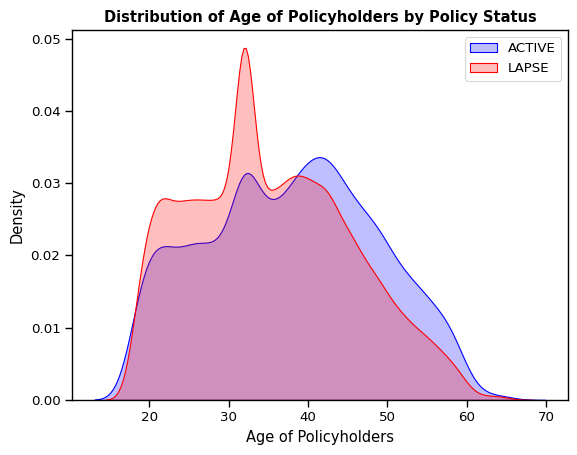

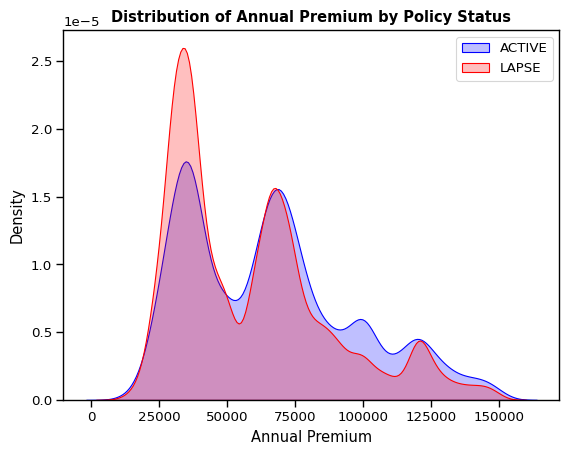

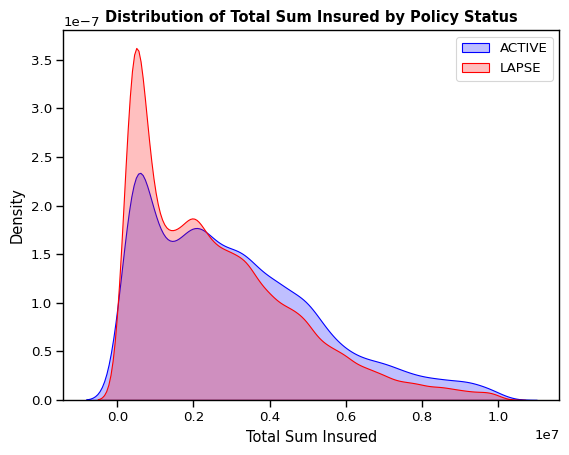

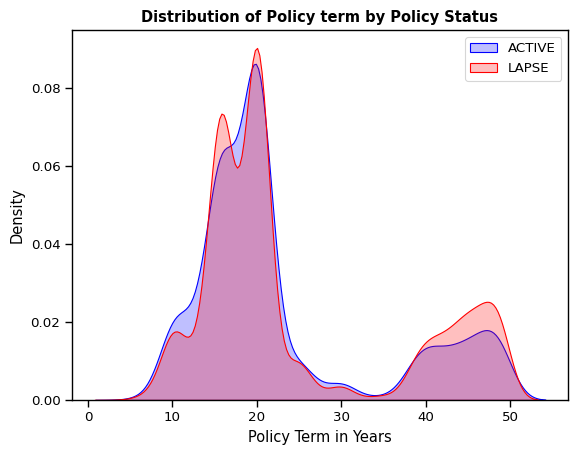

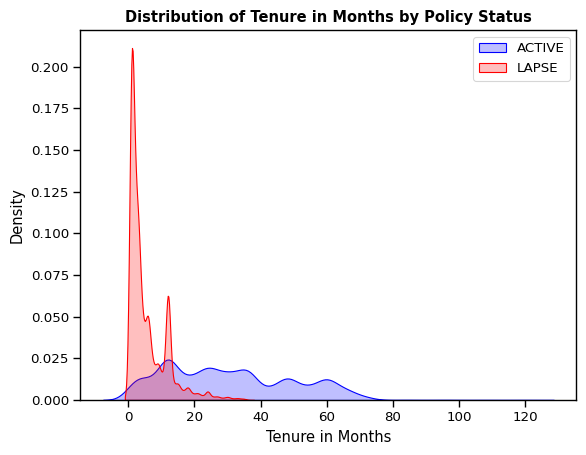

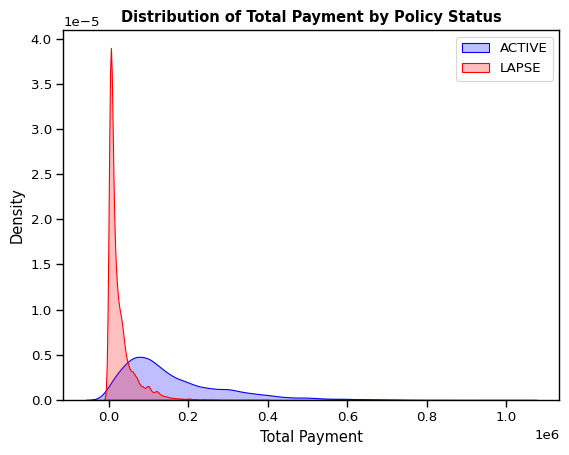

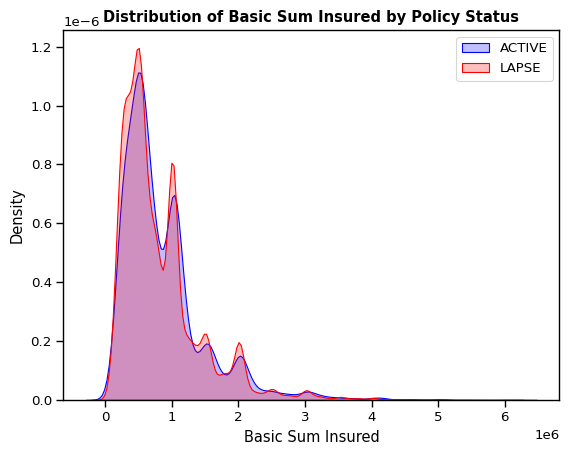

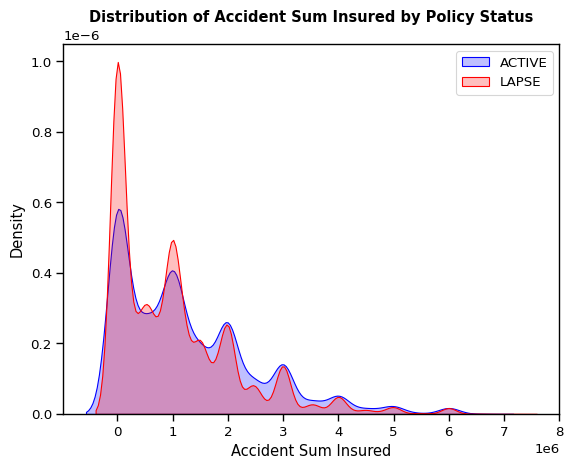

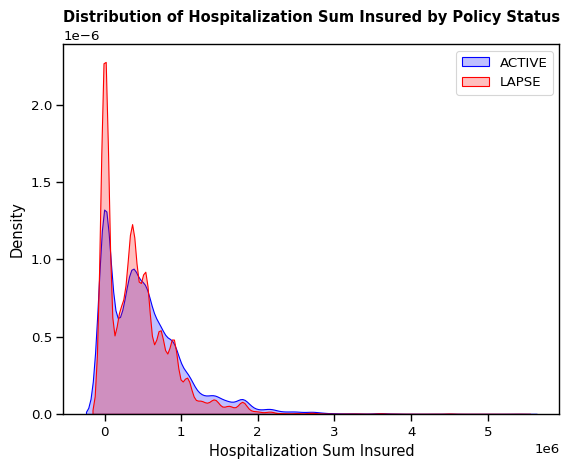

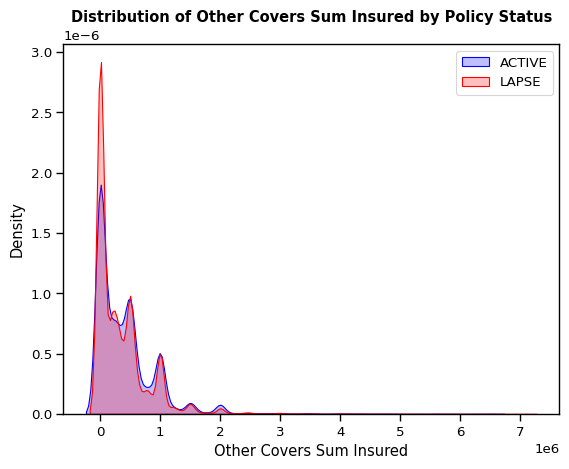

In [210]:
#Density plots to present the distribution of Active vs Lapse Policies with respect to different numerical variables

def create_density_plot(data, column, title, x_label, legend_labels, fill_colors):
    sns.set_context("paper", font_scale=1.1)
    ax = sns.kdeplot(data[column][data["POLICY_STATUS"] == legend_labels[0]], color=fill_colors[0], fill=True)
    for i in range(1, len(legend_labels)):
        ax = sns.kdeplot(data[column][data["POLICY_STATUS"] == legend_labels[i]], ax=ax, color=fill_colors[i], fill=True)
    ax.legend(legend_labels, loc='upper right')
    ax.set_ylabel('Density')
    ax.set_xlabel(x_label)
    ax.set_title(title, fontweight='bold')
    plt.show()


legend_labels = ['ACTIVE', 'LAPSE']
fill_colors = ['Blue', 'Red']

create_density_plot(df1, 'AGE', 'Distribution of Age of Policyholders by Policy Status', 'Age of Policyholders', legend_labels, fill_colors)
create_density_plot(df1, 'ANNUAL_PREMIUM', 'Distribution of Annual Premium by Policy Status', 'Annual Premium', legend_labels, fill_colors)
create_density_plot(df1, 'TOTAL_SUMINSURED', 'Distribution of Total Sum Insured by Policy Status', 'Total Sum Insured', legend_labels, fill_colors)
create_density_plot(df1, 'POLICYTERM_YEARS', 'Distribution of Policy term by Policy Status', 'Policy Term in Years', legend_labels, fill_colors)
create_density_plot(df1, 'TENURE_MONTHS', 'Distribution of Tenure in Months by Policy Status', 'Tenure in Months', legend_labels, fill_colors)
create_density_plot(df1, 'TOTAL_PAYMENT', 'Distribution of Total Payment by Policy Status', 'Total Payment', legend_labels, fill_colors)
create_density_plot(df1, 'BASIC_SUMINSURED', 'Distribution of Basic Sum Insured by Policy Status', 'Basic Sum Insured', legend_labels, fill_colors)
create_density_plot(df1, 'ACCIDENT_SUMINSURED', 'Distribution of Accident Sum Insured by Policy Status', 'Accident Sum Insured', legend_labels, fill_colors)
create_density_plot(df1, 'HOSPITALIZATION_SUMINSURED', 'Distribution of Hospitalization Sum Insured by Policy Status', 'Hospitalization Sum Insured', legend_labels, fill_colors)
create_density_plot(df1, 'OTHER COVERS_SUMINSURED', 'Distribution of Other Covers Sum Insured by Policy Status', 'Other Covers Sum Insured', legend_labels, fill_colors)



In [211]:
# Select categorical variables (object or category dtype)
categorical_vars = df1.select_dtypes(include=['object', 'category'])

# Select numerical variables (int or float dtype)
numerical_vars = df1.select_dtypes(include=['int', 'float'])

# Example of printing the lists of variables
print("Categorical Variables:")
print(categorical_vars.columns.tolist())

print("\nNumerical Variables:")
print(numerical_vars.columns.tolist())

Categorical Variables:
['POLICYNO', 'PRODUCT_TYPE', 'PAYMENT_FREQUENCY', 'PAYMENT_METHOD', 'GENDER', 'MARITAL_STATUS', 'POLICY_STATUS']

Numerical Variables:
['POLICYTERM_YEARS', 'COMMENCED_YEAR', 'ANNUAL_PREMIUM', 'NEXTPAYMENT_YEAR', 'TENURE_MONTHS', 'NO_OF_COVERS', 'TOTAL_SUMINSURED', 'BASIC_SUMINSURED', 'ACCIDENT_SUMINSURED', 'HOSPITALIZATION_SUMINSURED', 'OTHER COVERS_SUMINSURED', 'AGE', 'TOTAL_PAYMENT']


In [212]:
#Chi squared test & Cramer's V for Product type and Policy Status

# Create a contingency table
ct1 = pd.crosstab(df1['PRODUCT_TYPE'], df1['POLICY_STATUS'])

# Perform the chi-squared test
chi2, p, _, _ = chi2_contingency(ct1)

# Calculate Cramer's V
n1 = ct1.sum().sum()
C1, R1 = ct1.shape[1], ct1.shape[0]  # Number of columns and rows
cramers_v = np.sqrt(chi2 / (n1 * min(C1 - 1, R1 - 1)))

# Print the results
print(ct1)
print(f"Chi-Squared Test Statistic: {chi2}")
print(f"P-Value: {p}")
print(f"Cramer's V: {cramers_v}")

POLICY_STATUS  ACTIVE  LAPSE
PRODUCT_TYPE                
ENDOW            7084  32982
UL               5313  15392
Chi-Squared Test Statistic: 534.7945960550527
P-Value: 2.5578038202422695e-118
Cramer's V: 0.09380917437123555


In [213]:
#Chi squared test & Cramer's V for Payment Frequency and Policy Status

# Create a contingency table
ct2 = pd.crosstab(df1['PAYMENT_FREQUENCY'], df1['POLICY_STATUS'])

# Perform the chi-squared test
chi2, p, _, _ = chi2_contingency(ct2)

# Calculate Cramer's V
n2 = ct2.sum().sum()
C2, R2 = ct2.shape[1], ct2.shape[0]  # Number of columns and rows
cramers_v = np.sqrt(chi2 / (n2 * min(C2 - 1, R2 - 1)))

# Print the results
print(ct2)
print(f"Chi-Squared Test Statistic: {chi2}")
print(f"P-Value: {p}")
print(f"Cramer's V: {cramers_v}")

POLICY_STATUS      ACTIVE  LAPSE
PAYMENT_FREQUENCY               
A                    2693   2707
H                     686   1423
M                    7766  39755
Q                    1252   4489
Chi-Squared Test Statistic: 3568.09598528534
P-Value: 0.0
Cramer's V: 0.24230929442839022


In [214]:
#Chi squared test & Cramer's V for Payment Method and Policy Status

# Create a contingency table
ct3 = pd.crosstab(df1['PAYMENT_METHOD'], df1['POLICY_STATUS'])

# Perform the chi-squared test
chi2, p, _, _ = chi2_contingency(ct3)

# Calculate Cramer's V
n3 = ct3.sum().sum()
C3, R3 = ct3.shape[1], ct3.shape[0]  # Number of columns and rows
cramers_v = np.sqrt(chi2 / (n3 * min(C3 - 1, R3 - 1)))

# Print the results
print(ct3)
print(f"Chi-Squared Test Statistic: {chi2}")
print(f"P-Value: {p}")
print(f"Cramer's V: {cramers_v}")

POLICY_STATUS    ACTIVE  LAPSE
PAYMENT_METHOD                
CASH               8728  41817
DIGITAL PAYMENT    1238   3529
STANDING ORDER     2431   3028
Chi-Squared Test Statistic: 2354.244849011211
P-Value: 0.0
Cramer's V: 0.1968238048601732


In [215]:
#Chi squared test & Cramer's V for Gender and Policy Status

# Create a contingency table
ct4 = pd.crosstab(df1['GENDER'], df1['POLICY_STATUS'])

# Perform the chi-squared test
chi2, p, _, _ = chi2_contingency(ct4)

# Calculate Cramer's V
n4 = ct4.sum().sum()
C4, R4 = ct4.shape[1], ct4.shape[0]  # Number of columns and rows
cramers_v = np.sqrt(chi2 / (n4 * min(C4 - 1, R4 - 1)))

# Print the results
print(ct4)
print(f"Chi-Squared Test Statistic: {chi2}")
print(f"P-Value: {p}")
print(f"Cramer's V: {cramers_v}")

POLICY_STATUS  ACTIVE  LAPSE
GENDER                      
F                5338  19918
M                7059  28456
Chi-Squared Test Statistic: 14.340874711791226
P-Value: 0.00015251713737662875
Cramer's V: 0.015361712377458061


In [216]:
#Chi squared test & Cramer's V for Marital Status and Policy Status

# Create a contingency table
ct5 = pd.crosstab(df1['MARITAL_STATUS'], df1['POLICY_STATUS'])

# Perform the chi-squared test
chi2, p, _, _ = chi2_contingency(ct5)

# Calculate Cramer's V
n5 = ct5.sum().sum()
C5, R5 = ct5.shape[1], ct5.shape[0]  # Number of columns and rows
cramers_v = np.sqrt(chi2 / (n5 * min(C5 - 1, R5 - 1)))

# Print the results
print(ct5)
print(f"Chi-Squared Test Statistic: {chi2}")
print(f"P-Value: {p}")
print(f"Cramer's V: {cramers_v}")

POLICY_STATUS   ACTIVE  LAPSE
MARITAL_STATUS               
M                 9258  35375
S                 3139  12999
Chi-Squared Test Statistic: 12.095686541786838
P-Value: 0.000505386029516739
Cramer's V: 0.014108052606234312


In [217]:
def point_biserial_correlation(iv, dv):
    """Calculates the point-biserial correlation between two variables.

    Args:
      iv: Independent Variable.
      dv: Dependent Variable.

    Returns:
      The point-biserial correlation coefficient.
    """
    
    # Calculate the mean of 'ANNUAL_PREMIUM' for 'LAPSE' policies
    mean_X1 = np.mean(iv[dv == 'LAPSE'])
    
    # Calculate the mean of 'ANNUAL_PREMIUM' for 'ACTIVE' policies
    mean_X0 = np.mean(iv[dv == 'ACTIVE'])
    
    # Calculate the overall standard deviation of 'ANNUAL_PREMIUM'
    std_X = np.std(iv)
    
    # Calculate the point-biserial correlation coefficient
    point_biserial_correlation = (mean_X1 - mean_X0) / std_X
    
    return point_biserial_correlation


# Extract the Independent and Dependent Variables

iv1 = df1['ANNUAL_PREMIUM']
iv2 = df1['POLICYTERM_YEARS']
iv3 = df1['TOTAL_SUMINSURED']
iv4 = df1['NO_OF_COVERS']
iv5 = df1['AGE']
iv6 = df1['BASIC_SUMINSURED']
iv7 = df1['ACCIDENT_SUMINSURED']
iv8 = df1['HOSPITALIZATION_SUMINSURED']
iv9 = df1['OTHER COVERS_SUMINSURED']
dv1 = df1['POLICY_STATUS']


# Calculate the point-biserial correlation coefficient.
point_biserial_corr_1 = point_biserial_correlation(iv1, dv1)
point_biserial_corr_2 = point_biserial_correlation(iv2, dv1)
point_biserial_corr_3 = point_biserial_correlation(iv3, dv1)
point_biserial_corr_4 = point_biserial_correlation(iv4, dv1)
point_biserial_corr_5 = point_biserial_correlation(iv5, dv1)
point_biserial_corr_6 = point_biserial_correlation(iv6, dv1)
point_biserial_corr_7 = point_biserial_correlation(iv7, dv1)
point_biserial_corr_8 = point_biserial_correlation(iv8, dv1)
point_biserial_corr_9 = point_biserial_correlation(iv9, dv1)


# Print the point-biserial correlation coefficient.
print(f"Point-Biserial Correlation Coefficient between Annual Premium and Policy Status: {point_biserial_corr_1}")
print(f"Point-Biserial Correlation Coefficient between Policy Term and Policy Status: {point_biserial_corr_2}")
print(f"Point-Biserial Correlation Coefficient between Total Sum Insured and Policy Status: {point_biserial_corr_3}")
print(f"Point-Biserial Correlation Coefficient between No of covers and Policy Status: {point_biserial_corr_4}")
print(f"Point-Biserial Correlation Coefficient between Age and Policy Status: {point_biserial_corr_5}")
print(f"Point-Biserial Correlation Coefficient between Basic Sum Insured and Policy Status: {point_biserial_corr_6}")
print(f"Point-Biserial Correlation Coefficient between Accident Sum Insured and Policy Status: {point_biserial_corr_7}")
print(f"Point-Biserial Correlation Coefficient between Hospitalization Sum Insured and Policy Status: {point_biserial_corr_8}")
print(f"Point-Biserial Correlation Coefficient between Other Covers Sum Insured and Policy Status: {point_biserial_corr_9}")



Point-Biserial Correlation Coefficient between Annual Premium and Policy Status: -0.23993733912574478
Point-Biserial Correlation Coefficient between Policy Term and Policy Status: 0.11697838365763558
Point-Biserial Correlation Coefficient between Total Sum Insured and Policy Status: -0.21017524451625294
Point-Biserial Correlation Coefficient between No of covers and Policy Status: -0.13456398800003244
Point-Biserial Correlation Coefficient between Age and Policy Status: -0.2404384475206295
Point-Biserial Correlation Coefficient between Basic Sum Insured and Policy Status: -0.06876821975403971
Point-Biserial Correlation Coefficient between Accident Sum Insured and Policy Status: -0.20607087390099493
Point-Biserial Correlation Coefficient between Hospitalization Sum Insured and Policy Status: -0.20825604731312225
Point-Biserial Correlation Coefficient between Other Covers Sum Insured and Policy Status: -0.12695093773250893


In [218]:
#Label Encoding for columns with 2 or less unique values

df2 = df1.copy()

#Encoding Gender as Male=1 and Female=0
df2.GENDER = [1 if x == "M" else 0 for x in df2.GENDER]

#Encoding Marital Status as Married=1 and Unmarried=0
df2.MARITAL_STATUS = [1 if x == "M" else 0 for x in df2.MARITAL_STATUS]

#Encoding Product Type as ENDOW=1 and UL=0
df2.PRODUCT_TYPE = [1 if x == "ENDOW" else 0 for x in df2.PRODUCT_TYPE]

#Encoding Policy Status as Lapse=1 and Active=0
df2.POLICY_STATUS = [1 if x == "LAPSE" else 0 for x in df2.POLICY_STATUS]

In [219]:
df2.head()

,POLICYNO,PRODUCT_TYPE,POLICYTERM_YEARS,COMMENCED_YEAR,PAYMENT_FREQUENCY,ANNUAL_PREMIUM,PAYMENT_METHOD,NEXTPAYMENT_YEAR,TENURE_MONTHS,NO_OF_COVERS,TOTAL_SUMINSURED,BASIC_SUMINSURED,ACCIDENT_SUMINSURED,HOSPITALIZATION_SUMINSURED,OTHER COVERS_SUMINSURED,AGE,GENDER,MARITAL_STATUS,TOTAL_PAYMENT,POLICY_STATUS
0,NJEV2018-453,1,49,2018,M,24732,CASH,2018,3,1,500000,500000,0,0,0,32,1,1,6183,1
1,NJEV2018-2541,1,49,2018,M,24732,CASH,2018,1,1,500000,500000,0,0,0,32,1,1,2061,1
2,NJEV2018-1209,1,49,2018,M,24732,CASH,2018,1,1,500000,500000,0,0,0,32,1,1,2061,1
3,NJEV2018-1378,1,49,2018,M,24732,CASH,2020,21,1,500000,500000,0,0,0,32,0,1,43281,1
4,NJEV2018-1853,1,49,2018,M,24732,CASH,2018,1,1,500000,500000,0,0,0,32,1,1,2061,1


In [220]:
#Check the remaining categorical variables

catagorical = [i for i in df2.columns if df2[i].dtypes == 'object']

for i in catagorical:   
    print(i, ':', df2[i].unique())

POLICYNO : ['NJEV2018-453' 'NJEV2018-2541' 'NJEV2018-1209' ... 'NGT022018-97'
 'JCA012018-552' 'JCA012018-25']
PAYMENT_FREQUENCY : ['M' 'A' 'Q' 'H']
PAYMENT_METHOD : ['CASH' 'STANDING ORDER' 'DIGITAL PAYMENT']


In [221]:
# Define the columns required to one-hot encode

columns_to_encode = ['PAYMENT_FREQUENCY', 'PAYMENT_METHOD']

# Use Pandas' get_dummies function to perform one-hot encoding
dfe1 = pd.get_dummies(df2, columns=columns_to_encode)

columns_to_convert=['PAYMENT_FREQUENCY_A','PAYMENT_FREQUENCY_H','PAYMENT_FREQUENCY_Q','PAYMENT_FREQUENCY_M','PAYMENT_METHOD_CASH','PAYMENT_METHOD_DIGITAL PAYMENT','PAYMENT_METHOD_STANDING ORDER']

dfe1[columns_to_convert] = dfe1[columns_to_convert].astype(int)

In [222]:
dfe1 = dfe1.drop(["POLICYNO","COMMENCED_YEAR","NEXTPAYMENT_YEAR"], axis = 1)
dfe1.head()

,PRODUCT_TYPE,POLICYTERM_YEARS,ANNUAL_PREMIUM,TENURE_MONTHS,NO_OF_COVERS,TOTAL_SUMINSURED,BASIC_SUMINSURED,ACCIDENT_SUMINSURED,HOSPITALIZATION_SUMINSURED,OTHER COVERS_SUMINSURED,...,MARITAL_STATUS,TOTAL_PAYMENT,POLICY_STATUS,PAYMENT_FREQUENCY_A,PAYMENT_FREQUENCY_H,PAYMENT_FREQUENCY_M,PAYMENT_FREQUENCY_Q,PAYMENT_METHOD_CASH,PAYMENT_METHOD_DIGITAL PAYMENT,PAYMENT_METHOD_STANDING ORDER
0,1,49,24732,3,1,500000,500000,0,0,0,...,1,6183,1,0,0,1,0,1,0,0
1,1,49,24732,1,1,500000,500000,0,0,0,...,1,2061,1,0,0,1,0,1,0,0
2,1,49,24732,1,1,500000,500000,0,0,0,...,1,2061,1,0,0,1,0,1,0,0
3,1,49,24732,21,1,500000,500000,0,0,0,...,1,43281,1,0,0,1,0,1,0,0
4,1,49,24732,1,1,500000,500000,0,0,0,...,1,2061,1,0,0,1,0,1,0,0


In [223]:
print(dfe1.info())


<class 'pandas.core.frame.DataFrame'>
Index: 60771 entries, 0 to 61052
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype
---  ------                          --------------  -----
 0   PRODUCT_TYPE                    60771 non-null  int64
 1   POLICYTERM_YEARS                60771 non-null  int64
 2   ANNUAL_PREMIUM                  60771 non-null  int64
 3   TENURE_MONTHS                   60771 non-null  int64
 4   NO_OF_COVERS                    60771 non-null  int64
 5   TOTAL_SUMINSURED                60771 non-null  int64
 6   BASIC_SUMINSURED                60771 non-null  int64
 7   ACCIDENT_SUMINSURED             60771 non-null  int64
 8   HOSPITALIZATION_SUMINSURED      60771 non-null  int64
 9   OTHER COVERS_SUMINSURED         60771 non-null  int64
 10  AGE                             60771 non-null  int64
 11  GENDER                          60771 non-null  int64
 12  MARITAL_STATUS                  60771 non-null  int64
 13  TOTAL_

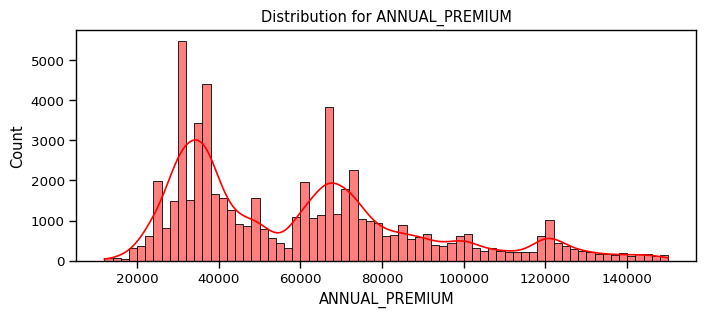

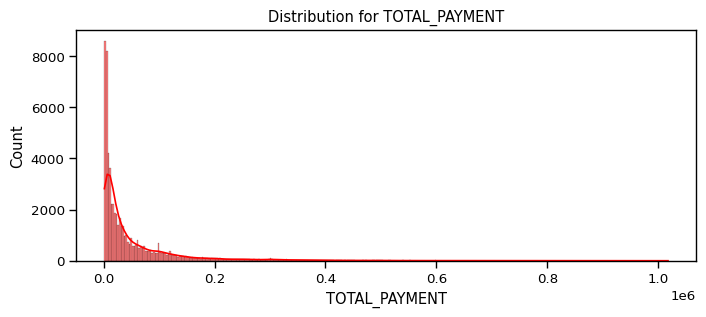

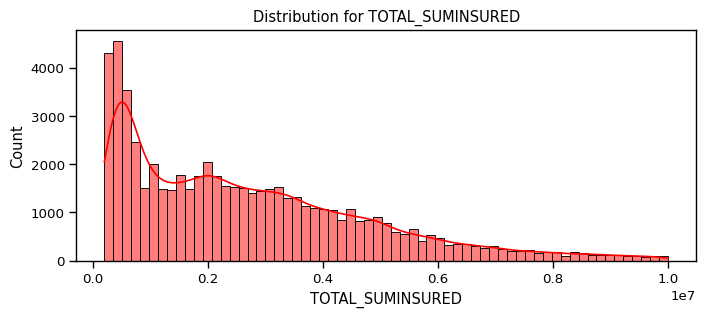

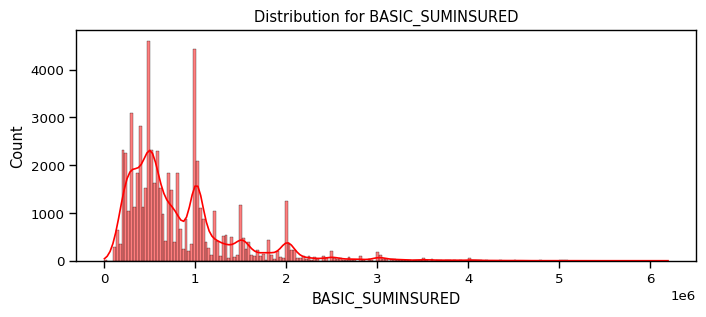

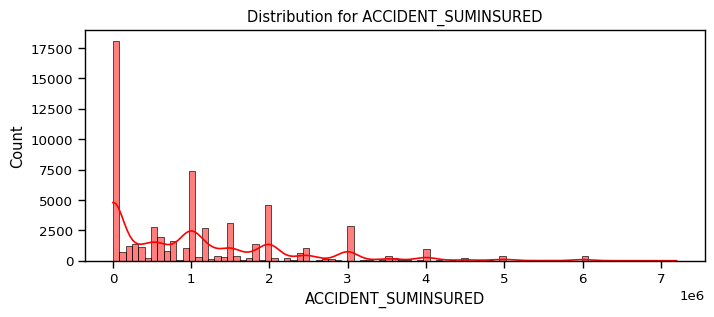

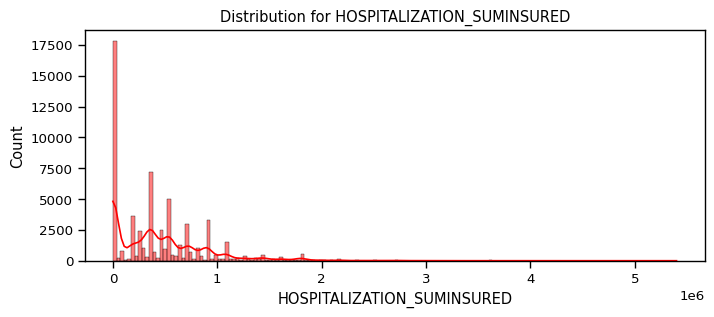

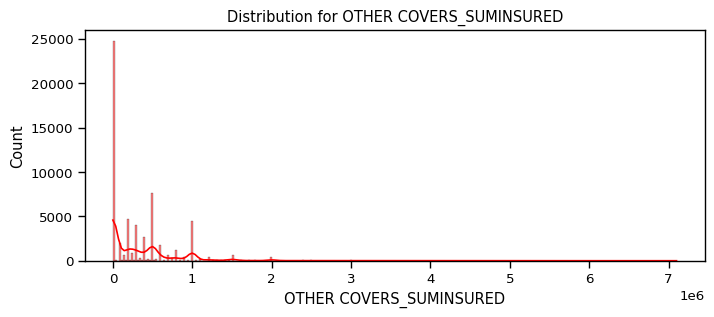

In [224]:
def distplot(feature, frame, color='r'):
    plt.figure(figsize=(8, 3))
    plt.title("Distribution for {}".format(feature))
    ax = sns.histplot(frame[feature], color=color, kde=True)

col = ['ANNUAL_PREMIUM', 'TOTAL_PAYMENT','TOTAL_SUMINSURED','BASIC_SUMINSURED','ACCIDENT_SUMINSURED','HOSPITALIZATION_SUMINSURED','OTHER COVERS_SUMINSURED']
for feature in col:
    distplot(feature, dfe1)

In [225]:
dfe1_std = dfe1.copy()

# Specify the columns to standardize
cols_to_standardize = ['ANNUAL_PREMIUM', 'TOTAL_PAYMENT', 'TOTAL_SUMINSURED', 'BASIC_SUMINSURED',
                       'ACCIDENT_SUMINSURED', 'HOSPITALIZATION_SUMINSURED', 'OTHER COVERS_SUMINSURED']

# Create a StandardScaler instance
scaler = StandardScaler()

# Standardize the selected columns
dfe1_std[cols_to_standardize] = scaler.fit_transform(dfe1_std[cols_to_standardize])

In [226]:
dfe1_std.head()

,PRODUCT_TYPE,POLICYTERM_YEARS,ANNUAL_PREMIUM,TENURE_MONTHS,NO_OF_COVERS,TOTAL_SUMINSURED,BASIC_SUMINSURED,ACCIDENT_SUMINSURED,HOSPITALIZATION_SUMINSURED,OTHER COVERS_SUMINSURED,...,MARITAL_STATUS,TOTAL_PAYMENT,POLICY_STATUS,PAYMENT_FREQUENCY_A,PAYMENT_FREQUENCY_H,PAYMENT_FREQUENCY_M,PAYMENT_FREQUENCY_Q,PAYMENT_METHOD_CASH,PAYMENT_METHOD_DIGITAL PAYMENT,PAYMENT_METHOD_STANDING ORDER
0,1,49,-1.189497,3,1,-1.039728,-0.533604,-0.917875,-0.944684,-0.705955,...,1,-0.565754,1,0,0,1,0,1,0,0
1,1,49,-1.189497,1,1,-1.039728,-0.533604,-0.917875,-0.944684,-0.705955,...,1,-0.614069,1,0,0,1,0,1,0,0
2,1,49,-1.189497,1,1,-1.039728,-0.533604,-0.917875,-0.944684,-0.705955,...,1,-0.614069,1,0,0,1,0,1,0,0
3,1,49,-1.189497,21,1,-1.039728,-0.533604,-0.917875,-0.944684,-0.705955,...,1,-0.130922,1,0,0,1,0,1,0,0
4,1,49,-1.189497,1,1,-1.039728,-0.533604,-0.917875,-0.944684,-0.705955,...,1,-0.614069,1,0,0,1,0,1,0,0


In [227]:
# Prepare data for model training and testing input.
y = dfe1_std.POLICY_STATUS.values     # Target feature

# All features except class (target)
X = dfe1_std.drop(["POLICY_STATUS"],axis=1)

# Split the data into training and testing data
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size = 0.25, random_state=0)



In [228]:
#Balancing the Imbalance class using SMOTE oversampling method

# Initialize SMOTE with a specific sampling strategy
smote = SMOTE()

# Fit and transform the data to perform SMOTE
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)


# Get the total number of records in the balanced dataset
total_records = len(y_resampled)
print(f"Total number of records in the balanced dataset: {total_records}")

Total number of records in the balanced dataset: 72584


In [229]:
# Count the number of occurrences for each unique class label
class_counts = np.bincount(y_resampled)

# The count of records for class label 0
count_class_0 = class_counts[0]

# The count of records for class label 1
count_class_1 = class_counts[1]

print("Number of records for class 0:", count_class_0)
print("Number of records for class 1:", count_class_1)

Number of records for class 0: 36292
Number of records for class 1: 36292


In [230]:
# Logistic regression model on resampled data set

logistic_model = LogisticRegression(max_iter=1000)

# Train the model on the training data
logistic_model.fit(X_resampled, y_resampled)

# Make predictions on the test data
y_pred = logistic_model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("Precision:", precision)
print("Recall:", recall)
print("Confusion Matrix:\n", confusion)
print("Classification Report:\n", report)

Accuracy: 0.8917264529717633
F1 Score: 0.9312779379203744
Precision: 0.9401940109658372
Recall: 0.9225293825525576
Confusion Matrix:
 [[ 2402   709]
 [  936 11146]]
Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.77      0.74      3111
           1       0.94      0.92      0.93     12082

    accuracy                           0.89     15193
   macro avg       0.83      0.85      0.84     15193
weighted avg       0.90      0.89      0.89     15193



In [231]:
# Classification using RBF SVM on the undersampled dataset

svc_rbf = SVC(kernel="rbf")
svc_rbf = svc_rbf.fit(X_resampled, y_resampled)
pred_svc_rbf = svc_rbf.predict(X_test)

accuracy_svc_rbf = accuracy_score(y_test, pred_svc_rbf)
f1_score_svc_rbf = f1_score(y_test,pred_svc_rbf)
precision_svc_rbf = precision_score(y_test, pred_svc_rbf)
recall_svc_rbf = recall_score(y_test, pred_svc_rbf)
confusion_svc_rbf = confusion_matrix(y_test, pred_svc_rbf)

print("Accuracy with SVM RBF on Undersampled Data:", accuracy_svc_rbf)
print("F1 score with SVM RBF on Undersampled Data:", f1_score_svc_rbf)
print("Precision with SVM RBF on Undersampled Data:", precision_svc_rbf)
print("Recall with SVM RBF on Undersampled Data:", recall_svc_rbf)
print("Confusion Matrix with SVM RBF on Undersampled Data:\n", confusion_svc_rbf)
print("Classification Report with SVM RBF on Undersampled Data:\n", classification_report(y_test, pred_svc_rbf))

Accuracy with SVM RBF on Undersampled Data: 0.8819193049430659
F1 score with SVM RBF on Undersampled Data: 0.923989492415897
Precision with SVM RBF on Undersampled Data: 0.9465277777777777
Recall with SVM RBF on Undersampled Data: 0.9024995861612316
Confusion Matrix with SVM RBF on Undersampled Data:
 [[ 2495   616]
 [ 1178 10904]]
Classification Report with SVM RBF on Undersampled Data:
               precision    recall  f1-score   support

           0       0.68      0.80      0.74      3111
           1       0.95      0.90      0.92     12082

    accuracy                           0.88     15193
   macro avg       0.81      0.85      0.83     15193
weighted avg       0.89      0.88      0.89     15193



In [232]:
models = []

models.append(('Logistic Regression', LogisticRegression(solver='liblinear', random_state = 0)))
models.append(('SVC', SVC(kernel = 'linear', random_state = 0)))
models.append(('Kernel SVM', SVC(kernel = 'rbf', random_state = 0)))
models.append(('Decision Tree Classifier', DecisionTreeClassifier(criterion = 'entropy', random_state = 0)))
models.append(('Random Forest', RandomForestClassifier(n_estimators=100, criterion = 'entropy', random_state = 0)))
models.append(("Adaboost", AdaBoostClassifier()))
models.append(("Gradient boost classifier", GradientBoostingClassifier()))
models.append(("Voting Classifier",  VotingClassifier(estimators=[('gbc', GradientBoostingClassifier()), ('lr', LogisticRegression(max_iter=1000)), ('abc',  AdaBoostClassifier())], voting='soft')))


In [233]:
acc_results =[]
auc_results =[]
names = []

result_col = ["Algorithm", "ROC AUC Mean", "ROC AUC STD", "Accuracy Mean", "Accuracy STD"]
model_results = pd.DataFrame(columns = result_col)

i=0
# K- fold cross validation

for name, model in models:
    names.append(name)
    kfold = model_selection.KFold(n_splits=5, shuffle=True, random_state=0)
    
    cv_acc_results = model_selection.cross_val_score(model, X_resampled, y_resampled, cv = kfold, scoring="accuracy")
    cv_auc_results = model_selection.cross_val_score(model, X_resampled, y_resampled,cv = kfold, scoring="roc_auc")
    acc_results.append(cv_acc_results)
    auc_results.append(cv_auc_results)
    
    model_results.loc[i] = [name, 
                           round(cv_auc_results.mean()*100,2),
                           round(cv_auc_results.std()*100,2),
                           round(cv_acc_results.mean()*100,2),
                           round(cv_acc_results.std()*100,2)]
    i+=1

model_results.sort_values(by = ['ROC AUC Mean'], ascending=False)

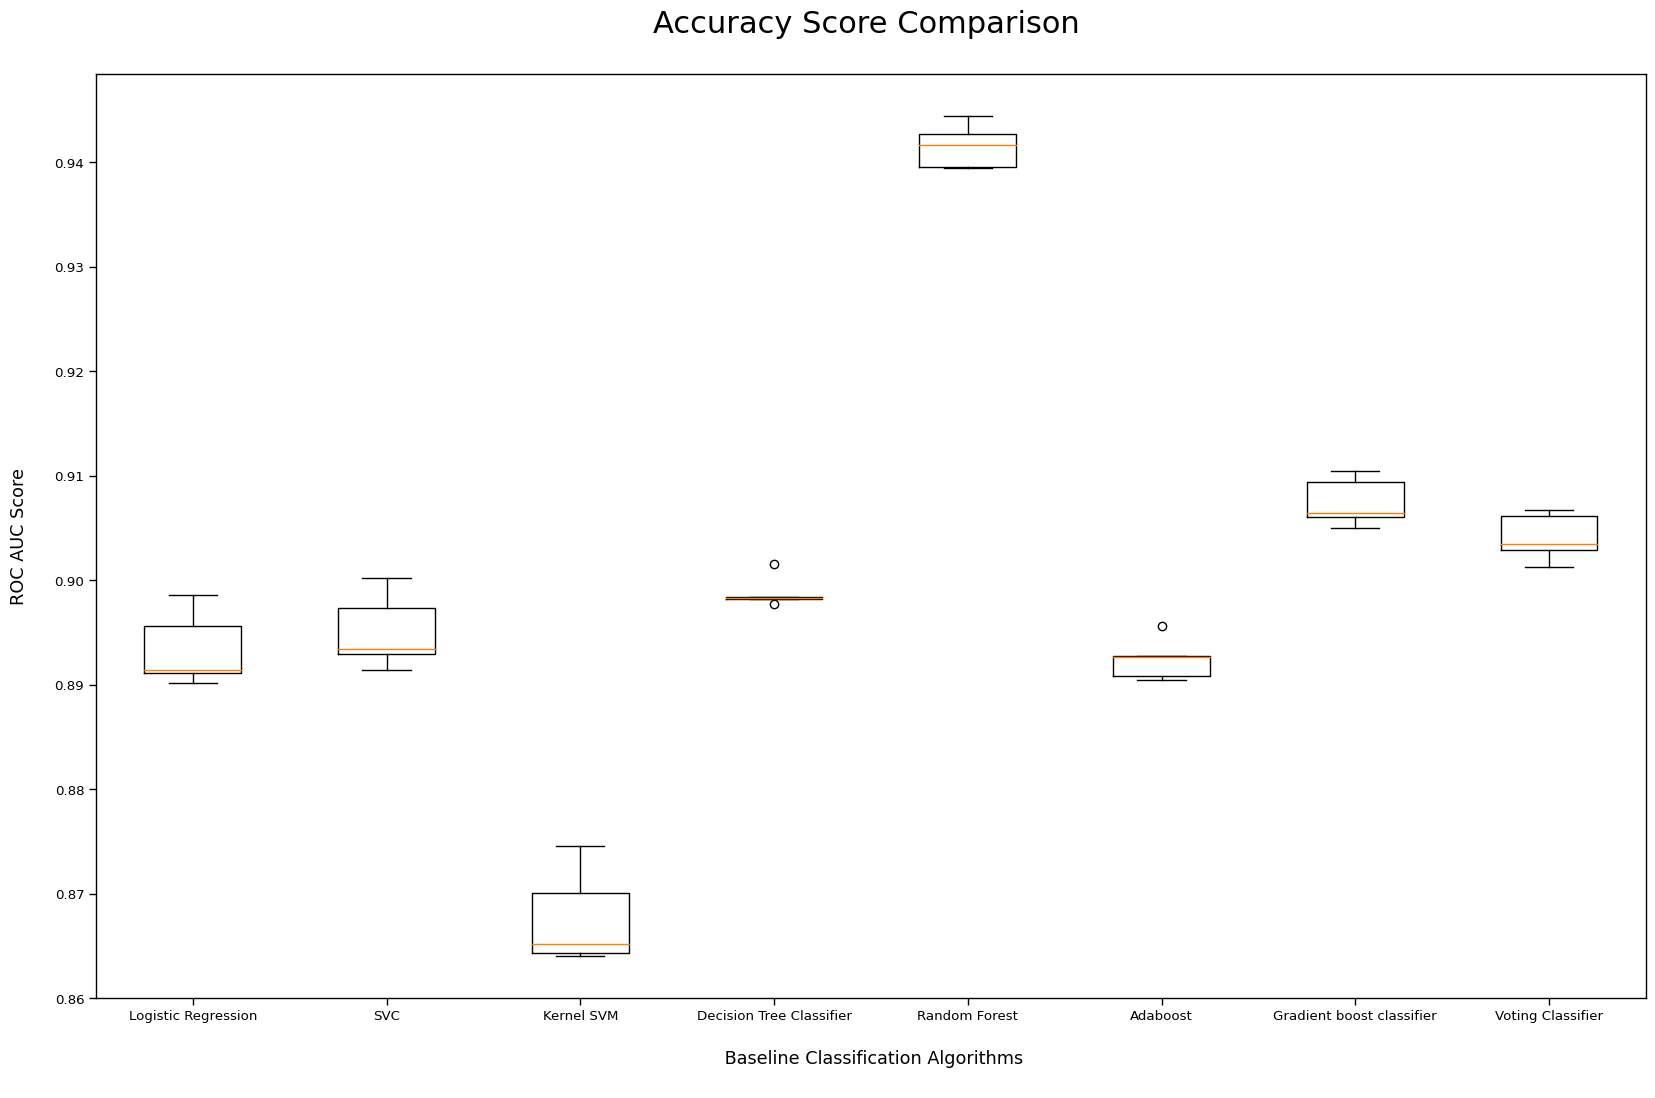

In [ ]:
#Accuracy Score Comparison

fig = plt.figure(figsize=(20,12))
ax = fig.add_subplot(111)
plt.boxplot(acc_results)
ax.set_xticklabels(names)

plt.ylabel('ROC AUC Score\n',
horizontalalignment="center",fontstyle = "normal", 
fontsize = "large", fontfamily = "sans-serif")

plt.xlabel('\n Baseline Classification Algorithms\n',
horizontalalignment="center",fontstyle = "normal", 
fontsize = "large", fontfamily = "sans-serif")

plt.title('Accuracy Score Comparison \n',
horizontalalignment="center", fontstyle = "normal", 
fontsize = "22", fontfamily = "sans-serif")

plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
plt.show()

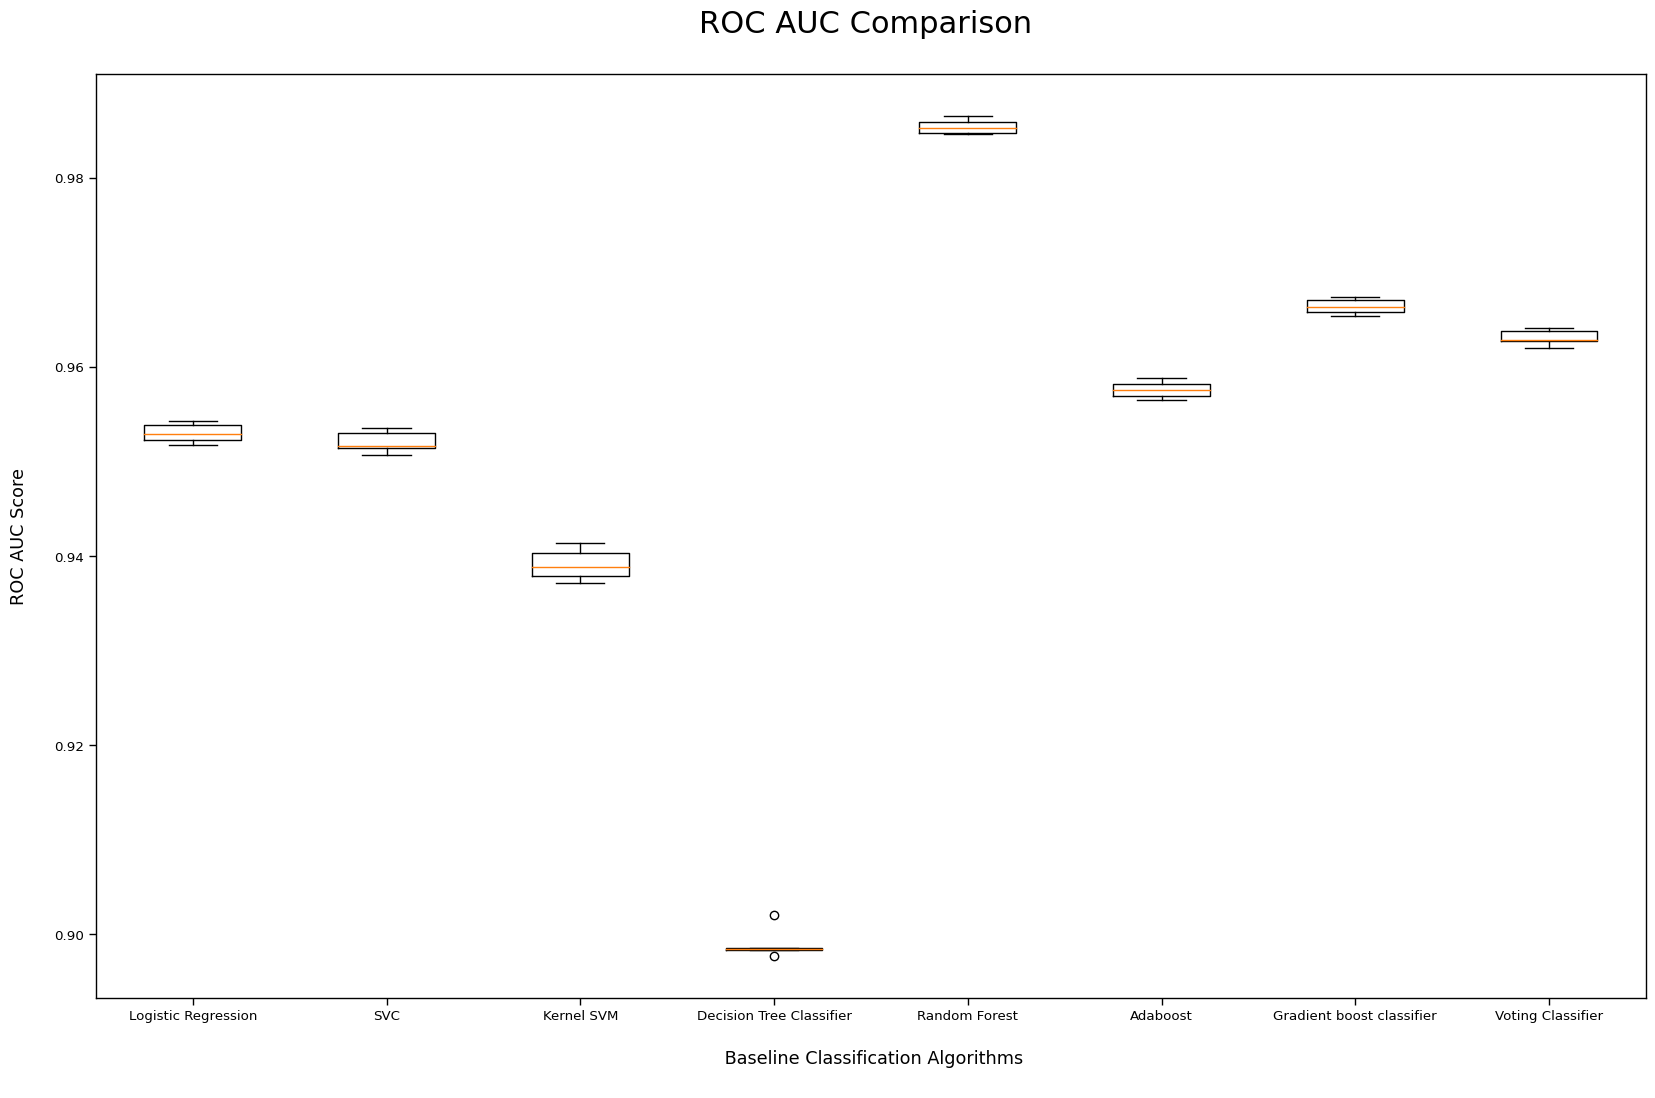

In [ ]:
#ROC AUC Comparison

fig = plt.figure(figsize=(20,12))
ax = fig.add_subplot(111)
plt.boxplot(auc_results)
ax.set_xticklabels(names)

plt.ylabel('ROC AUC Score\n',
horizontalalignment="center",fontstyle = "normal", 
fontsize = "large", fontfamily = "sans-serif")

plt.xlabel('\n Baseline Classification Algorithms\n',
horizontalalignment="center",fontstyle = "normal", 
fontsize = "large", fontfamily = "sans-serif")

plt.title('ROC AUC Comparison \n',
horizontalalignment="center", fontstyle = "normal", 
fontsize = "22", fontfamily = "sans-serif")

plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
plt.show()

In [ ]:
#Score array to find out the Optimal no of Trees for Random Forest model

score_array = []
for each in range(1,100):
    rf_loop = RandomForestClassifier(n_estimators = each, random_state = 1) 
    rf_loop.fit(X_resampled, y_resampled)
    score_array.append(rf_loop.score(X_test,y_test))


for i,j in enumerate(score_array):
    print(i+1,":",j)

1 : 0.847452934662237
2 : 0.8093853820598007
3 : 0.8854512735326688
4 : 0.8668327796234773
5 : 0.8932724252491694
6 : 0.8839977851605758
7 : 0.8969407530454042
8 : 0.8930647840531561
9 : 0.9004014396456257
10 : 0.8961794019933554
11 : 0.9024086378737541
12 : 0.8983250276854928
13 : 0.9024778516057586
14 : 0.8995016611295681
15 : 0.9043466223698782
16 : 0.9003322259136213
17 : 0.905107973421927
18 : 0.903516057585825
19 : 0.9056616832779624
20 : 0.9037236987818383
21 : 0.9066998892580288
22 : 0.9038621262458472
23 : 0.90593853820598
24 : 0.9036544850498339
25 : 0.906076965669989
26 : 0.9039313399778516
27 : 0.9063538205980066
28 : 0.9038621262458472
29 : 0.905592469545958
30 : 0.904000553709856
31 : 0.9062153931339978
32 : 0.904000553709856
33 : 0.9058693244739756
34 : 0.9041389811738649
35 : 0.90593853820598
36 : 0.904000553709856
37 : 0.9053848283499446
38 : 0.9045542635658915
39 : 0.907045957918051
40 : 0.905454042081949
41 : 0.9062153931339978
42 : 0.9058001107419712
43 : 0.90635382

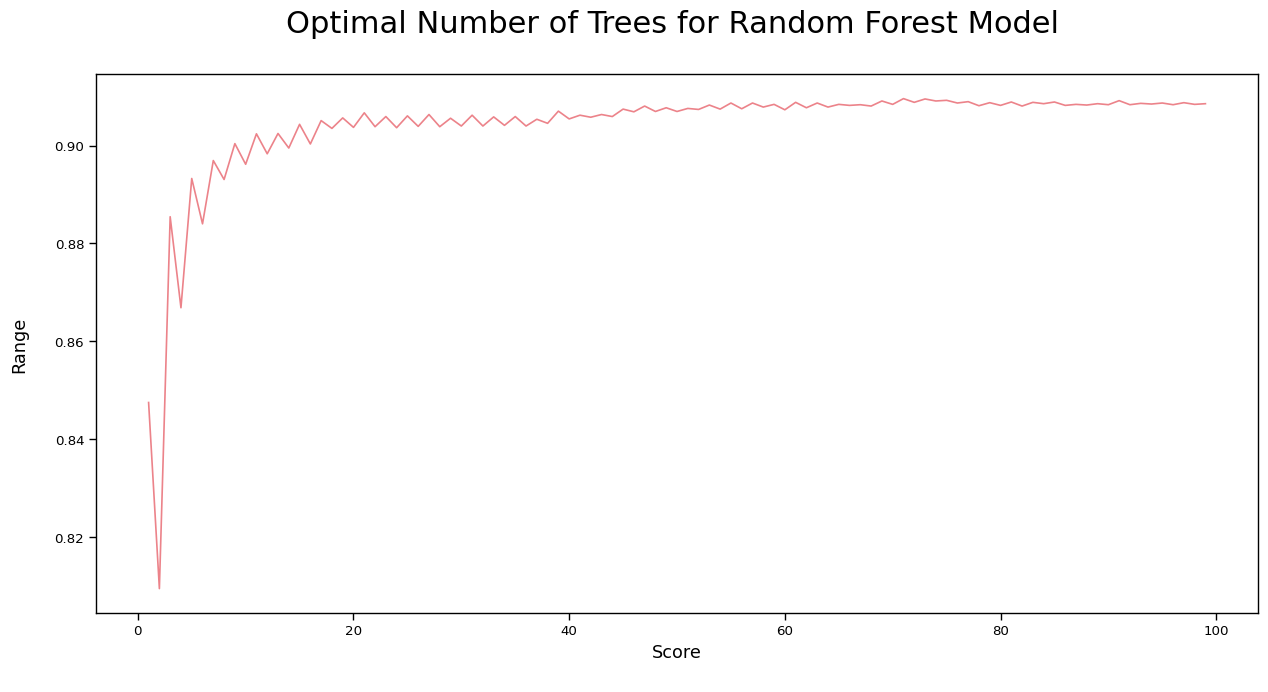

In [ ]:
#Plot of Optimal Number of Trees

fig = plt.figure(figsize=(15, 7))
plt.plot(range(1,100),score_array, color = '#ec838a')
plt.ylabel('Range\n',horizontalalignment="center",
fontstyle = "normal", fontsize = "large", 
fontfamily = "sans-serif")
plt.xlabel('Score\n',horizontalalignment="center",
fontstyle = "normal", fontsize = "large", 
fontfamily = "sans-serif")
plt.title('Optimal Number of Trees for Random Forest Model \n',horizontalalignment="center", fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")
#plt.legend(loc='top right', fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
plt.show()

In [ ]:
#Evaluation of results of different models

def model_evaluation(y_test, y_pred, model_name):
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    f2 = fbeta_score(y_test, y_pred, beta = 2.0)

    results = pd.DataFrame([[model_name, acc, prec, rec, f1, f2]], 
                       columns = ["Model", "Accuracy", "Precision", "Recall",
                                 "F1 Score", "F2 Score"])
    results = results.sort_values(["Precision", "Recall", "F2 Score"], ascending = False)
    return results

In [ ]:
# Logistic regression
classifier1 = LogisticRegression(random_state=0,max_iter=1000)
classifier1.fit(X_resampled, y_resampled)
y_pred1 = classifier1.predict(X_test)

#SVC
classifier2 = SVC(kernel = 'linear', random_state = 0)
classifier2.fit(X_resampled, y_resampled)
y_pred2 = classifier2.predict(X_test)


#Kernel SVM
classifier3 = SVC(kernel="rbf", random_state =0)
classifier3.fit(X_resampled, y_resampled)
y_pred3 = classifier3.predict(X_test)


#Decision tree
classifier4 = DecisionTreeClassifier(criterion="entropy", random_state=0)
classifier4.fit(X_resampled, y_resampled)
y_pred4 = classifier4.predict(X_test)

#Random Forest
classifier5 = RandomForestClassifier(n_estimators=72, criterion="entropy", random_state=0)
classifier5.fit(X_resampled, y_resampled)
y_pred5 = classifier5.predict(X_test)

#Adaboost
classifier6 = AdaBoostClassifier()
classifier6.fit(X_resampled, y_resampled)
y_pred6 = classifier6.predict(X_test)

#Gradient Boost
classifier7 = GradientBoostingClassifier()
classifier7.fit(X_resampled, y_resampled)
y_pred7 = classifier7.predict(X_test)

#Voting Classifier
classifier8 = VotingClassifier(estimators=[('gbc', GradientBoostingClassifier()), ('lr', LogisticRegression(max_iter=1000)),('abc', AdaBoostClassifier())], voting='soft')
classifier8.fit(X_resampled, y_resampled)
y_pred8 = classifier8.predict(X_test)

In [ ]:
lr = model_evaluation(y_test, y_pred1, "Logistic Regression")
svm = model_evaluation(y_test, y_pred2, "SVM (Linear)")
k_svm = model_evaluation(y_test, y_pred3, "Kernel SVM")
dt = model_evaluation(y_test, y_pred4, "Decision Tree")
rf = model_evaluation(y_test, y_pred5, "Random Forest")
ab = model_evaluation(y_test, y_pred6, "Adaboost")
gb = model_evaluation(y_test, y_pred7, "Gradient Boost")
vc = model_evaluation(y_test, y_pred8, "Voting Classifier")


# Concatenate the DataFrames along the axis of rows
eval_ = pd.concat([lr, svm, k_svm, dt, rf, ab, gb, vc], axis=0)

# Sort the DataFrame in descending order by the specified performance metrics
eval_ = eval_.sort_values(["Precision", "Recall", "F1 Score"], ascending=False)

# Reset the index of the DataFrame
eval_ = eval_.reset_index(drop=True)

# Print the DataFrame
print(eval_)

                 Model  Accuracy  Precision    Recall  F1 Score  F2 Score
0           Kernel SVM  0.882960   0.946034  0.905581  0.925365  0.913392
1       Gradient Boost  0.893757   0.945198  0.920784  0.932832  0.925566
2        Random Forest  0.908223   0.944801  0.940394  0.942592  0.941272
3             Adaboost  0.877976   0.944148  0.901002  0.922070  0.909313
4    Voting Classifier  0.895764   0.942676  0.926227  0.934379  0.929471
5         SVM (Linear)  0.891404   0.939173  0.924326  0.931691  0.927258
6  Logistic Regression  0.890227   0.938466  0.923549  0.930947  0.926494
7        Decision Tree  0.863649   0.933093  0.893918  0.913086  0.901488


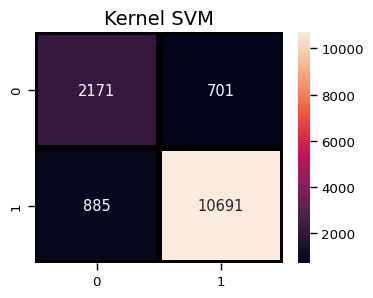

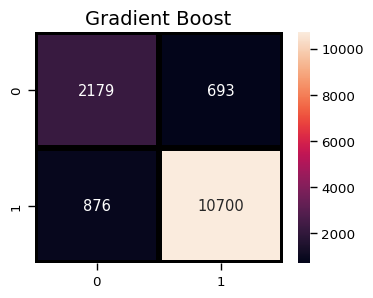

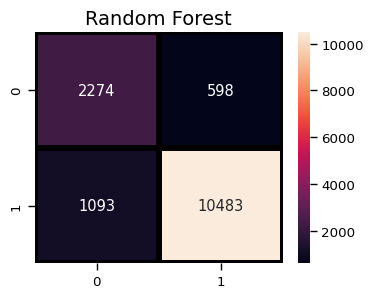

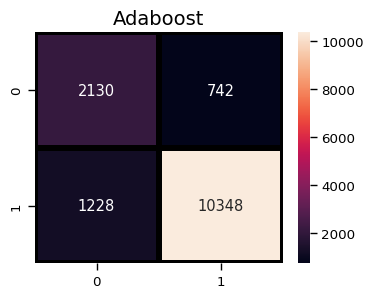

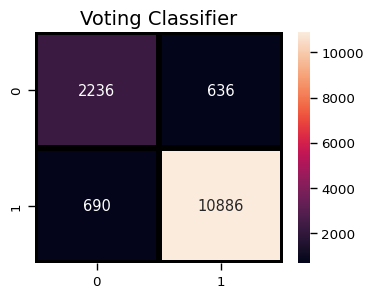

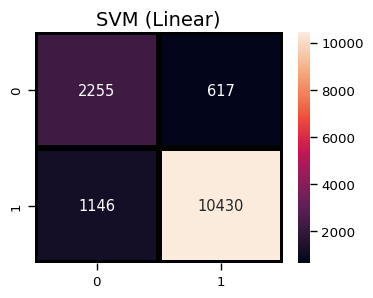

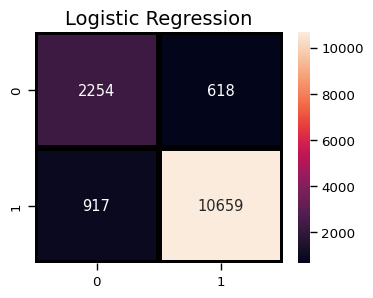

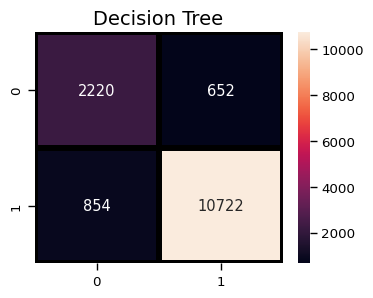

In [ ]:
predictions = [y_pred1, y_pred2 , y_pred3, y_pred4, y_pred5,  y_pred6, y_pred7, y_pred8]

for i, j in zip(predictions, eval_.Model.values):
    plt.figure(figsize=(4,3))
    sns.heatmap(confusion_matrix(y_test, i),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
    plt.title(j,fontsize=14)
    plt.show()

In [ ]:
#Model Evaluation

def k_fold_cross_validation(classifier_name, name):
    accuracies = cross_val_score(estimator=classifier_name,X=X_resampled, y= y_resampled, cv =5)
    print(name, "accuracy: %0.2f (+/- %0.2f)"  % (accuracies.mean(), accuracies.std() * 2))


k_fold_cross_validation(classifier6, "Adaboost")
k_fold_cross_validation(classifier8, "Voting classifier")
k_fold_cross_validation(classifier7, "Gradient Boost classifier")
k_fold_cross_validation(classifier1, "Logistic regression")
k_fold_cross_validation(classifier3, "Kernel SVM")


Adaboost accuracy: 0.89 (+/- 0.05)
Voting classifier accuracy: 0.90 (+/- 0.06)
Gradient Boost classifier accuracy: 0.91 (+/- 0.05)
Logistic regression accuracy: 0.89 (+/- 0.05)
Kernel SVM accuracy: 0.87 (+/- 0.02)


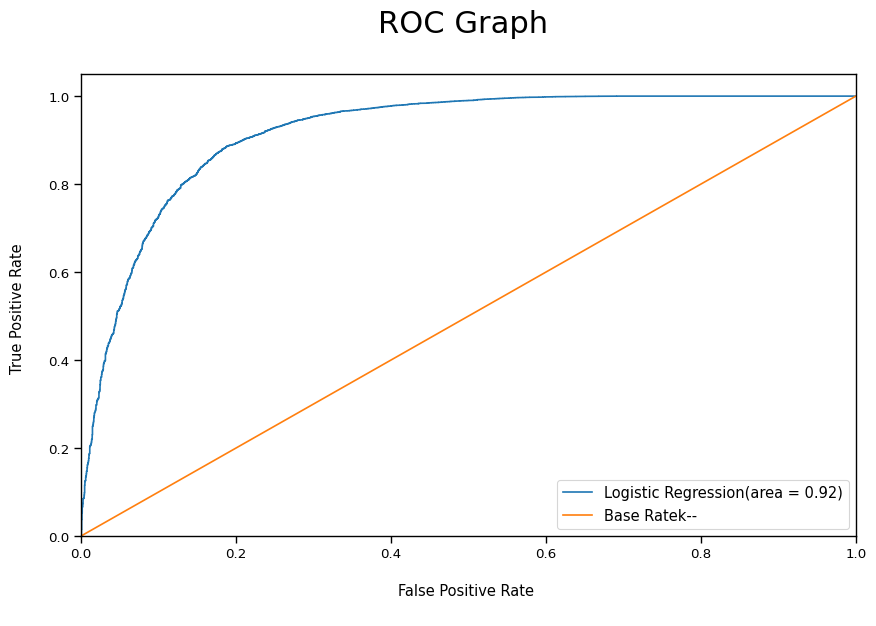

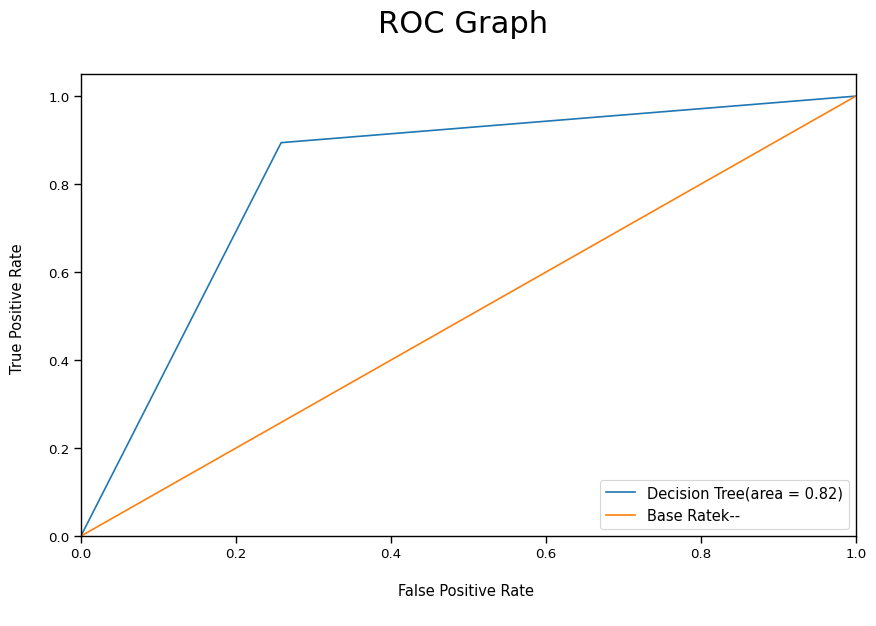

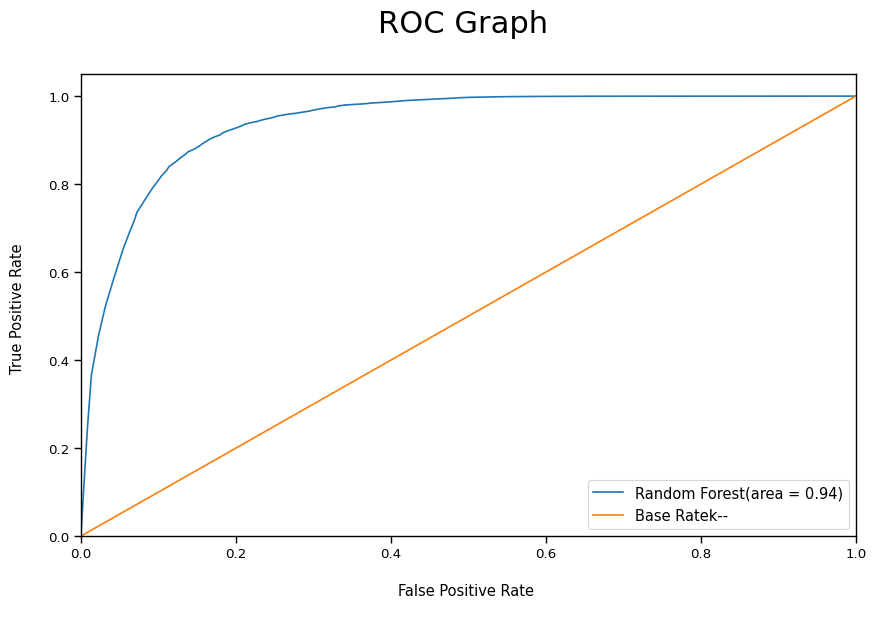

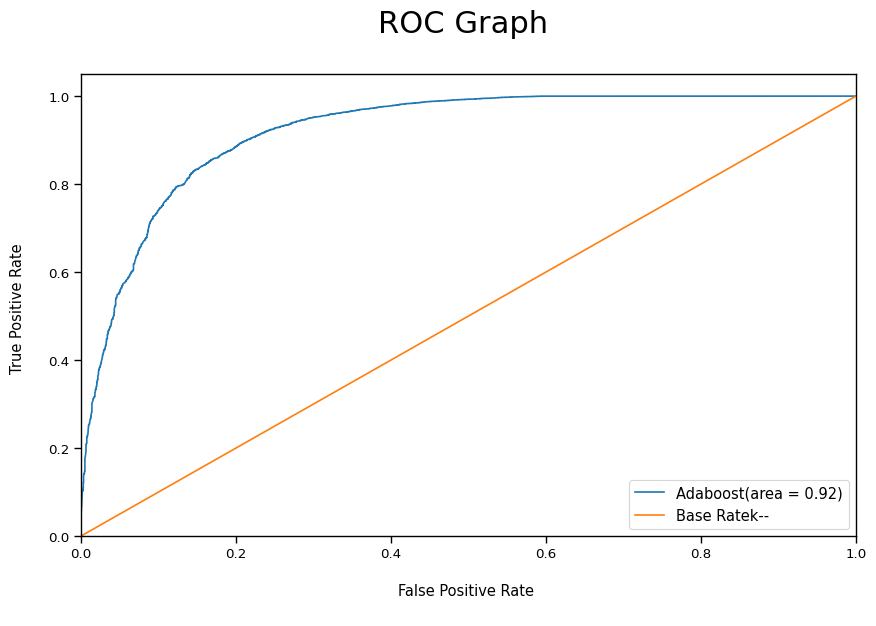

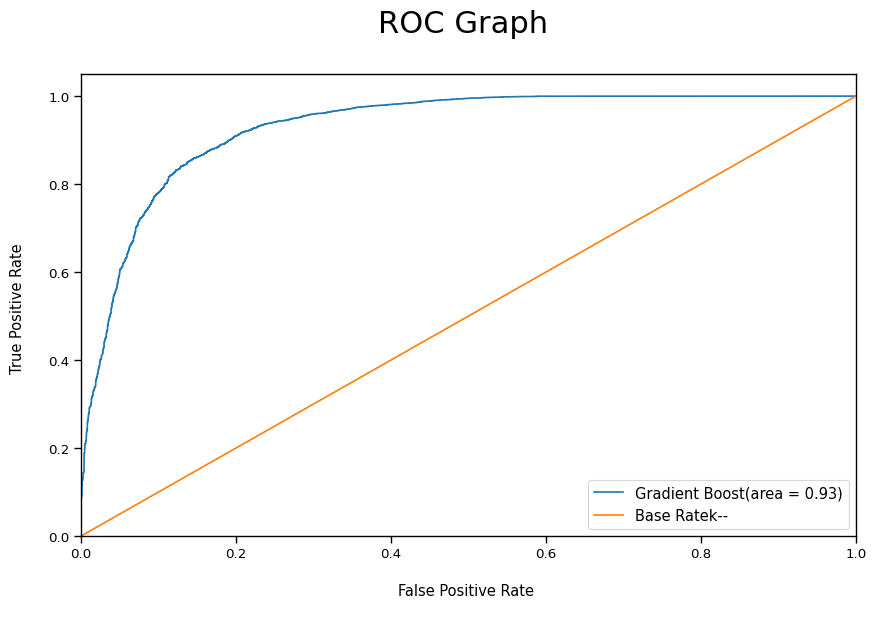

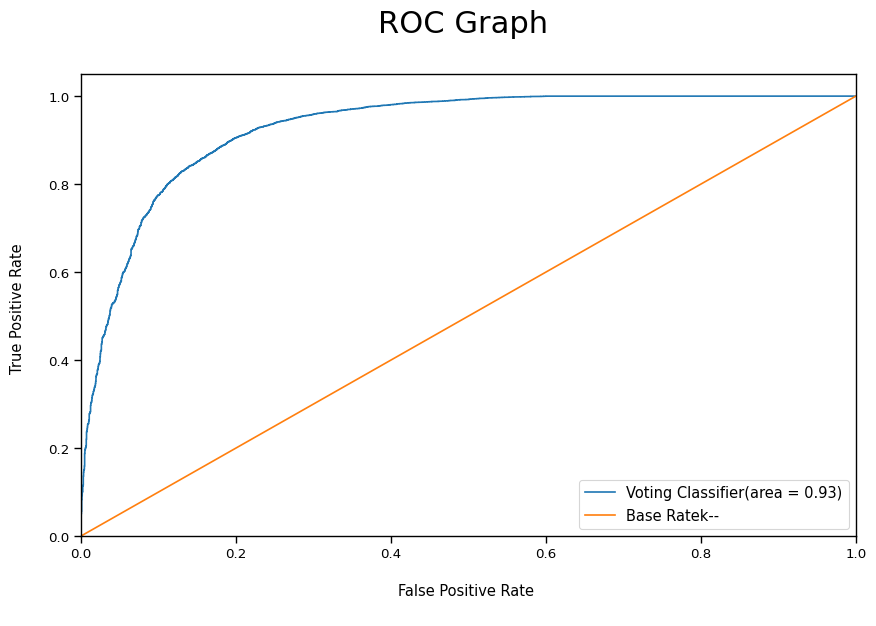

In [ ]:
# ROC Curve

def ROC_curve(classifier_, name, y_pred_):
    classifier_.fit(X_resampled, y_resampled) 
    probs = classifier_.predict_proba(X_test) 
    probs = probs[:, 1] 
    classifier_roc_auc = roc_auc_score(y_test, probs )
    rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, classifier_.predict_proba(X_test)[:,1])
    plt.figure(figsize=(10, 6))

    label_ = name + '(area = %0.2f)' % classifier_roc_auc
    # Plot Adaboost ROC
    plt.plot(rf_fpr, rf_tpr, 
    label=label_)
    # Plot Base Rate ROC
    plt.plot([0,1], [0,1],label='Base Rate' 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.ylabel('True Positive Rate \n',horizontalalignment="center",
    fontstyle = "normal", fontsize = "medium", 
    fontfamily = "sans-serif")

    plt.xlabel('\nFalse Positive Rate \n',horizontalalignment="center",
    fontstyle = "normal", fontsize = "medium", 
    fontfamily = "sans-serif")

    plt.title('ROC Graph \n',horizontalalignment="center", 
    fontstyle = "normal", fontsize = "22", 
    fontfamily = "sans-serif")

    plt.legend(loc="lower right", fontsize = "medium")
    plt.xticks(rotation=0, horizontalalignment="center")
    plt.yticks(rotation=0, horizontalalignment="right")
    plt.show()


preds = [y_pred1,  y_pred2, y_pred3, y_pred4, y_pred5, y_pred6, y_pred7, y_pred8]
classifiers = [classifier1 ,  classifier4, classifier5, classifier6, classifier7, classifier8]
model_names_ = ["Logistic Regression", "Decision Tree", "Random Forest", "Adaboost", "Gradient Boost",  "Voting Classifier"]

for i, j, k in zip(classifiers, model_names_, predictions):
    ROC_curve(i, j, k) 

In [ ]:
# Gradient Boost
feature_importances = pd.concat([pd.DataFrame(dfe1_std.columns, columns = ["features"]),
                                 pd.DataFrame(np.transpose(classifier7.feature_importances_), columns = ["coef"])],axis = 1)
feature_importances.sort_values(by = "coef", ascending = False)

,features,coef
13,TOTAL_PAYMENT,0.641576
3,TENURE_MONTHS,0.195973
18,PAYMENT_FREQUENCY_Q,0.025937
11,GENDER,0.017610
7,ACCIDENT_SUMINSURED,0.015583
19,PAYMENT_METHOD_CASH,0.014365
20,PAYMENT_METHOD_DIGITAL PAYMENT,0.014178
2,ANNUAL_PREMIUM,0.011043
17,PAYMENT_FREQUENCY_M,0.010312
9,OTHER COVERS_SUMINSURED,0.010303


In [ ]:
# Ada boost classifier
feature_importances = pd.concat([pd.DataFrame(dfe1_std.columns, columns = ["features"]),
                                 pd.DataFrame(np.transpose(classifier6.feature_importances_), columns = ["coef"])],axis = 1)
feature_importances.sort_values(by = "coef", ascending = False)

,features,coef
3,TENURE_MONTHS,0.16
13,TOTAL_PAYMENT,0.12
18,PAYMENT_FREQUENCY_Q,0.08
8,HOSPITALIZATION_SUMINSURED,0.08
20,PAYMENT_METHOD_DIGITAL PAYMENT,0.06
2,ANNUAL_PREMIUM,0.06
19,PAYMENT_METHOD_CASH,0.06
9,OTHER COVERS_SUMINSURED,0.06
16,PAYMENT_FREQUENCY_H,0.06
6,BASIC_SUMINSURED,0.04
